## Instituto Politécnico de Coimbra
## Instituto Superior de Engenharia de Coimbra
## Mestrado em Engenharia Informática - Machine Learning
## Elaborado por:

# André Proença 2016018783

# Isabel Castro 2018013160

## DATA SET ORIGINAL
## [https://archive.ics.uci.edu/ml/datasets/Bank+Marketing](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing)

In [1695]:
import seaborn as sea
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import string
from imblearn.under_sampling import RandomUnderSampler
from sklearn.utils import check_array
from sklearn.preprocessing import LabelEncoder
from scipy import sparse
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import random

## Used functions

In [1696]:
def randcolor(number):
    lista = []
    for i in range(number):
        color = "%06x" % random.randint(0, 0xFFFFFF)
        lista.append(color)
    return lista

In [1697]:
def plotFigureBoxPlot(columnName,dataset):
    plt.figure(figsize=(6,9))
    sea.boxplot(x=columnName, data=dataset, color='green')
    plt.title("Boxplot of {}" .format(columnName),size=20,color="red")
    plt.xlabel("{}".format(columnName),size=15)

In [1698]:
def numericAnalysis(columnName, dataframe):
    item = dataframe[columnName]

    print("Mean:\t", item.mean())
    print("Mode:\t", item.mode())
    print("Median:\t", item.median())
    print("Variance:\t", item.var())
    print("Std deviation:\t", item.std())
    print("Percentils (25, 50, 75):\t", item.quantile([0, 0.25, 0.5, 0.75, 1]));

In [1699]:
def plotBarChart(dataset, columnName):
    sea.set(style='whitegrid', palette="bright", font_scale=1.1, rc={"figure.figsize": [15, 10]})
    if(dataset[columnName].dtype != 'object'):
        sea.histplot(x=columnName, data=dataset, bins=np.arange(0, 100, 5), kde=True)
    else:
        sea.histplot(x=columnName, data=dataset, bins=np.arange(0, 100, 5))
    plt.title(string.capwords(columnName) + " " + "distribution")

In [1700]:
def plotPieChart(data, labels, title, color=None):
    
    
    fig1, ax1 = plt.subplots()
    if (color == None):
        plt.style.use('seaborn-pastel')
    ax1.pie(data,
            labels=labels,
            autopct="%.1f%%",
            startangle=90,
            colors=color,
            pctdistance=0.85)

    fig = plt.gcf()
    ax1.axis('equal')
    plt.tight_layout()
    plt.title(title)

In [1701]:
def plotBarChartByAgeRange(dataset, columnName, label, title):
    ageRange = list(range(15, 95, 5))

    plt.figure(figsize=(18, 25))
    plt.subplot(3, 2, 1)
    dataset.groupby(pd.cut(dataset.age, ageRange))[columnName].mean().plot.bar()
    plt.ylabel(label)
    plt.title(title)


In [1702]:
class CategoricalEncoder(BaseEstimator, TransformerMixin):
    """Encode categorical features as a numeric array.
    The input to this transformer should be a matrix of integers or strings,
    denoting the values taken on by categorical (discrete) features.
    The features can be encoded using a one-hot aka one-of-K scheme
    (``encoding='onehot'``, the default) or converted to ordinal integers
    (``encoding='ordinal'``).
    This encoding is needed for feeding categorical data to many scikit-learn
    estimators, notably linear models and SVMs with the standard kernels.
    Read more in the :ref:`User Guide `.
    Parameters
    ----------
    encoding : str, 'onehot', 'onehot-dense' or 'ordinal'
        The type of encoding to use (default is 'onehot'):
        - 'onehot': encode the features using a one-hot aka one-of-K scheme
          (or also called 'dummy' encoding). This creates a binary column for
          each category and returns a sparse matrix.
        - 'onehot-dense': the same as 'onehot' but returns a dense array
          instead of a sparse matrix.
        - 'ordinal': encode the features as ordinal integers. This results in
          a single column of integers (0 to n_categories - 1) per feature.
    categories : 'auto' or a list of lists/arrays of values.
        Categories (unique values) per feature:
        - 'auto' : Determine categories automatically from the training data.
        - list : ``categories[i]`` holds the categories expected in the ith
          column. The passed categories are sorted before encoding the data
          (used categories can be found in the ``categories_`` attribute).
    dtype : number type, default np.float64
        Desired dtype of output.
    handle_unknown : 'error' (default) or 'ignore'
        Whether to raise an error or ignore if a unknown categorical feature is
        present during transform (default is to raise). When this is parameter
        is set to 'ignore' and an unknown category is encountered during
        transform, the resulting one-hot encoded columns for this feature
        will be all zeros.
        Ignoring unknown categories is not supported for
        ``encoding='ordinal'``.
    Attributes
    ----------
    categories_ : list of arrays
        The categories of each feature determined during fitting. When
        categories were specified manually, this holds the sorted categories
        (in order corresponding with output of `transform`).
    Examples
    --------
    Given a dataset with three features and two samples, we let the encoder
    find the maximum value per feature and transform the data to a binary
    one-hot encoding.
    >>> from sklearn.preprocessing import LabelEncoder
    >>> enc = CategoricalEncoder(handle_unknown='ignore')
    >>> enc.fit([[0, 0, 3], [1, 1, 0], [0, 2, 1], [1, 0, 2]])
    ... # doctest: +ELLIPSIS
    CategoricalEncoder(categories='auto', dtype=<... 'numpy.float64'>,
              encoding='onehot', handle_unknown='ignore')
    >>> enc.transform([[0, 1, 1], [1, 0, 4]]).toarray()
    array([[ 1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.],
           [ 0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]])
    See also
    --------
    sklearn.preprocessing.OneHotEncoder : performs a one-hot encoding of
      integer ordinal features. The ``OneHotEncoder assumes`` that input
      features take on values in the range ``[0, max(feature)]`` instead of
      using the unique values.
    sklearn.feature_extraction.DictVectorizer : performs a one-hot encoding of
      dictionary items (also handles string-valued features).
    sklearn.feature_extraction.FeatureHasher : performs an approximate one-hot
      encoding of dictionary items or strings.
    """

    def __init__(self, encoding='onehot', categories='auto', dtype=np.float64,
                 handle_unknown='error'):
        self.encoding = encoding
        self.categories = categories
        self.dtype = dtype
        self.handle_unknown = handle_unknown

    def fit(self, X, y=None):
        """Fit the CategoricalEncoder to X.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_feature]
            The data to determine the categories of each feature.
        Returns
        -------
        self
        """

        if self.encoding not in ['onehot', 'onehot-dense', 'ordinal']:
            template = ("encoding should be either 'onehot', 'onehot-dense' "
                        "or 'ordinal', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.handle_unknown not in ['error', 'ignore']:
            template = ("handle_unknown should be either 'error' or "
                        "'ignore', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.encoding == 'ordinal' and self.handle_unknown == 'ignore':
            raise ValueError("handle_unknown='ignore' is not supported for"
                             " encoding='ordinal'")

        X = check_array(X, dtype=np.object, accept_sparse='csc', copy=True)
        n_samples, n_features = X.shape

        self._label_encoders_ = [LabelEncoder() for _ in range(n_features)]

        for i in range(n_features):
            le = self._label_encoders_[i]
            Xi = X[:, i]
            if self.categories == 'auto':
                le.fit(Xi)
            else:
                valid_mask = np.in1d(Xi, self.categories[i])
                if not np.all(valid_mask):
                    if self.handle_unknown == 'error':
                        diff = np.unique(Xi[~valid_mask])
                        msg = ("Found unknown categories {0} in column {1}"
                               " during fit".format(diff, i))
                        raise ValueError(msg)
                le.classes_ = np.array(np.sort(self.categories[i]))

        self.categories_ = [le.classes_ for le in self._label_encoders_]

        return self

    def transform(self, X):
        """Transform X using one-hot encoding.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_features]
            The data to encode.
        Returns
        -------
        X_out : sparse matrix or a 2-d array
            Transformed input.
        """
        X = check_array(X, accept_sparse='csc', dtype=np.object, copy=True)
        n_samples, n_features = X.shape
        X_int = np.zeros_like(X, dtype=np.int)
        X_mask = np.ones_like(X, dtype=np.bool)

        for i in range(n_features):
            valid_mask = np.in1d(X[:, i], self.categories_[i])

            if not np.all(valid_mask):
                if self.handle_unknown == 'error':
                    diff = np.unique(X[~valid_mask, i])
                    msg = ("Found unknown categories {0} in column {1}"
                           " during transform".format(diff, i))
                    raise ValueError(msg)
                else:
                    # Set the problematic rows to an acceptable value and
                    # continue `The rows are marked `X_mask` and will be
                    # removed later.
                    X_mask[:, i] = valid_mask
                    X[:, i][~valid_mask] = self.categories_[i][0]
            X_int[:, i] = self._label_encoders_[i].transform(X[:, i])

        if self.encoding == 'ordinal':
            return X_int.astype(self.dtype, copy=False)

        mask = X_mask.ravel()
        n_values = [cats.shape[0] for cats in self.categories_]
        n_values = np.array([0] + n_values)
        indices = np.cumsum(n_values)

        column_indices = (X_int + indices[:-1]).ravel()[mask]
        row_indices = np.repeat(np.arange(n_samples, dtype=np.int32),
                                n_features)[mask]
        data = np.ones(n_samples * n_features)[mask]

        out = sparse.csc_matrix((data, (row_indices, column_indices)),
                                shape=(n_samples, indices[-1]),
                                dtype=self.dtype).tocsr()
        if self.encoding == 'onehot-dense':
            return out.toarray()
        else:
            return out

In [1703]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]

## Dataset reading

In [1704]:
fullDataset = pd.read_csv('bank-full.csv', sep=';')

In [1705]:
fullDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [1706]:
#check missing values
fullDataset.count()

age          45211
job          45211
marital      45211
education    45211
default      45211
balance      45211
housing      45211
loan         45211
contact      45211
day          45211
month        45211
duration     45211
campaign     45211
pdays        45211
previous     45211
poutcome     45211
y            45211
dtype: int64

In [1707]:
#check if there are null values
fullDataset.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [1708]:
#check if there are Nan values
fullDataset.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [1709]:
#check if there are duplicated values
fullDataset.duplicated().sum()

0

In [1710]:
fullDataset.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


## ANALISAR SE O DATASET E BALANCED

In [1711]:
fullDataset.y.value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [1712]:
fulldatasetyCountsPercentage = fullDataset["y"].value_counts(normalize=True) * 100
fulldatasetyCountsPercentage

no     88.30152
yes    11.69848
Name: y, dtype: float64

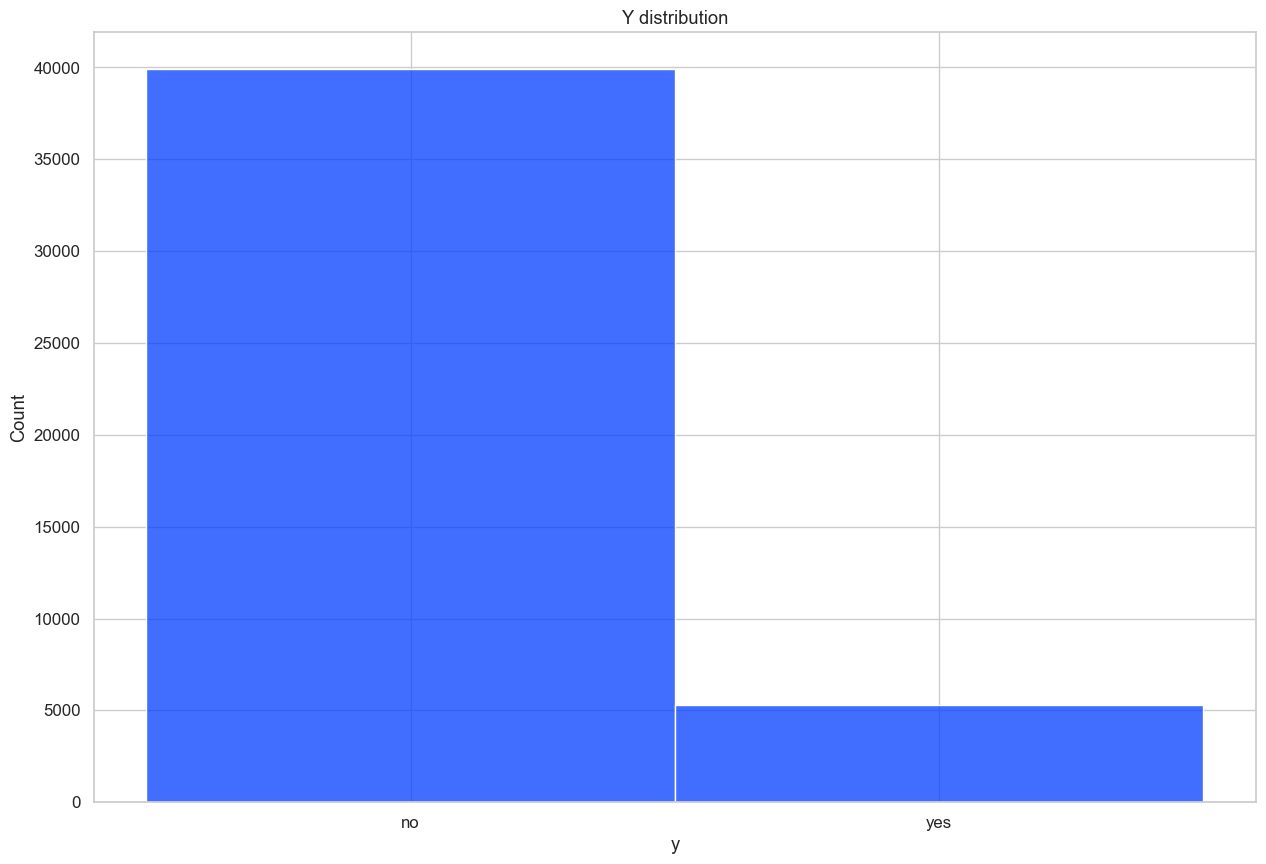

In [1713]:
plotBarChart(fullDataset,'y')

### Resampling Imbalanced Dataset

In [1714]:
X = fullDataset.drop('y',axis=1)
Y = fullDataset['y']

rus = RandomUnderSampler(sampling_strategy='majority', random_state=1)
xData, yData = rus.fit_resample(X, Y)

yData = yData.reset_index()
yData.drop('index', axis=1, inplace=True)

dataset = pd.concat([xData, yData], axis=1)

In [1715]:
yData.y.value_counts()

no     5289
yes    5289
Name: y, dtype: int64

Text(0.5, 1.0, 'Target Yes and No')

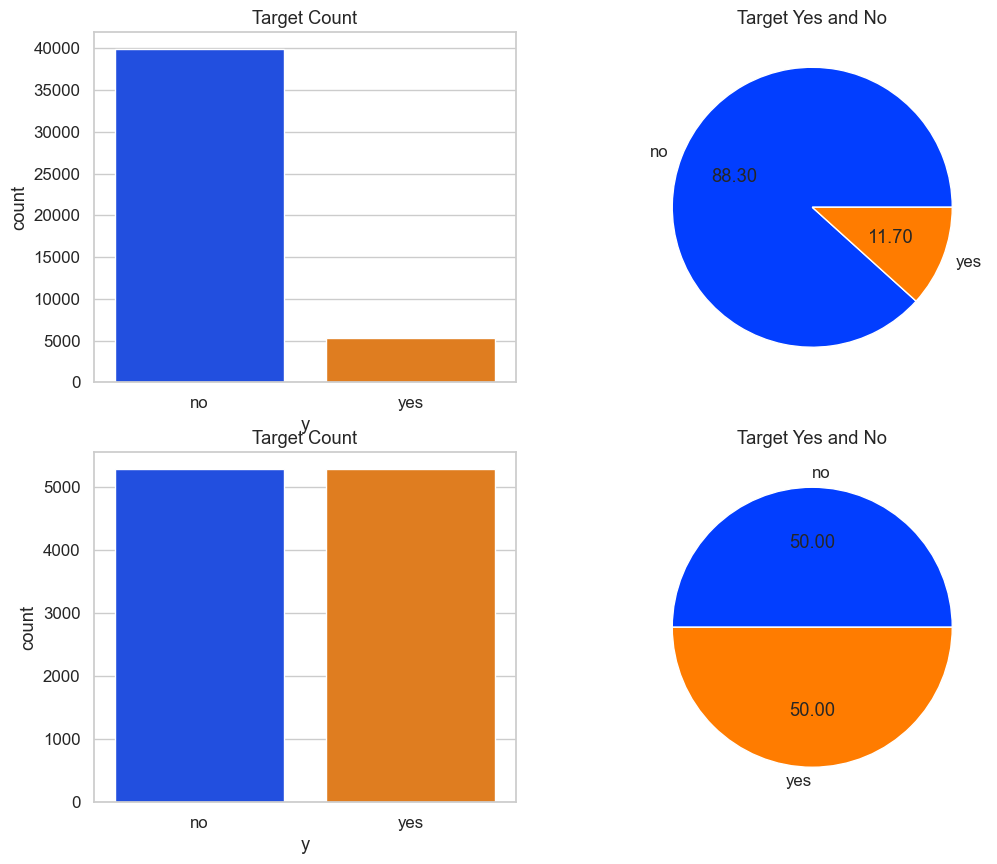

In [1716]:
plt.figure(figsize = (12,10))
plt.subplot(2,2,1)
sea.countplot(data=fullDataset, x='y')
plt.title('Target Count')

plt.subplot(2,2,2)
labels = fullDataset['y'].value_counts(sort=True).index
sizes = fullDataset['y'].value_counts(sort=True)
plt.pie(sizes,labels=labels,autopct='%.2f')
plt.title('Target Yes and No')

plt.subplot(2,2,3)
sea.countplot(data=yData, x='y')
plt.title('Target Count')

plt.subplot(2,2,4)
labels = yData['y'].value_counts(sort=True).index
sizes = yData['y'].value_counts(sort=True)
plt.pie(sizes,labels=labels,autopct='%.2f')
plt.title('Target Yes and No')

## Features Analysis

### Find the numeric outliers so that we can drop them when we get there

In [1717]:

cols = ['age','balance','day','duration','campaign','pdays','previous']
colsY=cols
colsY += ['y']


#plt.figure(figsize=(15,18))
#for i,numericDataset in enumerate(colsY):
 #   print(i,numericDataset)
  #  plt.subplot(4,2,i+1)
   # sea.boxplot(x=numericDataset,data=dataset[cols])
    #plt.title("Boxplot of {}".format(numericDataset),size=20,color="red")
    #plt.xlabel("{}".format(numericDataset),size=15)
#plt.tight_layout()

### Age

In [1718]:
numericAnalysis("age", dataset)

Mean:	 41.16430327093968
Mode:	 0    32
Name: age, dtype: int64
Median:	 38.0
Variance:	 143.335013795509
Std deviation:	 11.97226017907684
Percentils (25, 50, 75):	 0.00    18.0
0.25    32.0
0.50    38.0
0.75    49.0
1.00    95.0
Name: age, dtype: float64


In [1719]:
AgeCounts = dataset["age"].value_counts()
AgeCountsPercentage = dataset["age"].value_counts(normalize=True) * 100
AgeCountsPercentage

32    4.462091
33    4.225752
30    4.187937
31    4.159576
34    4.140669
        ...   
93    0.018907
90    0.018907
95    0.009454
94    0.009454
88    0.009454
Name: age, Length: 76, dtype: float64

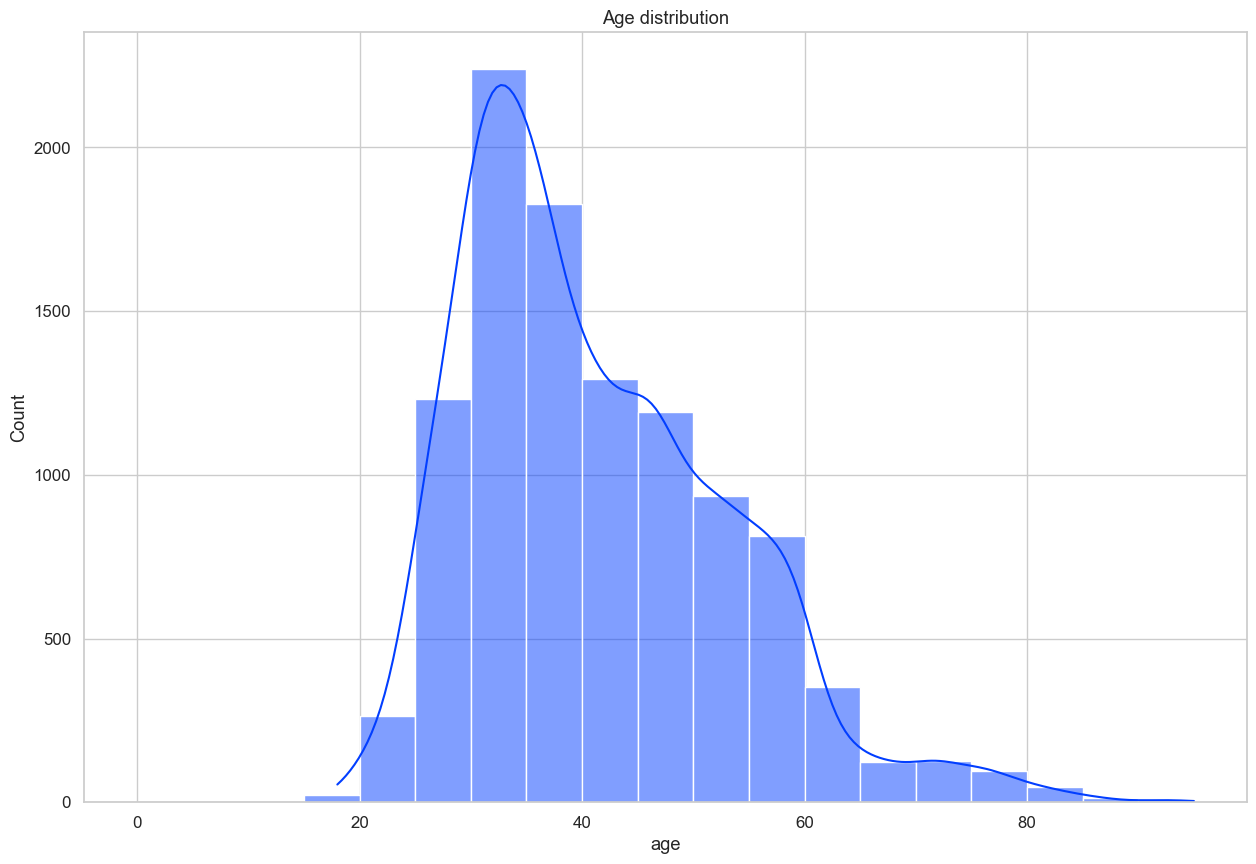

In [1720]:
plotBarChart(dataset, "age")

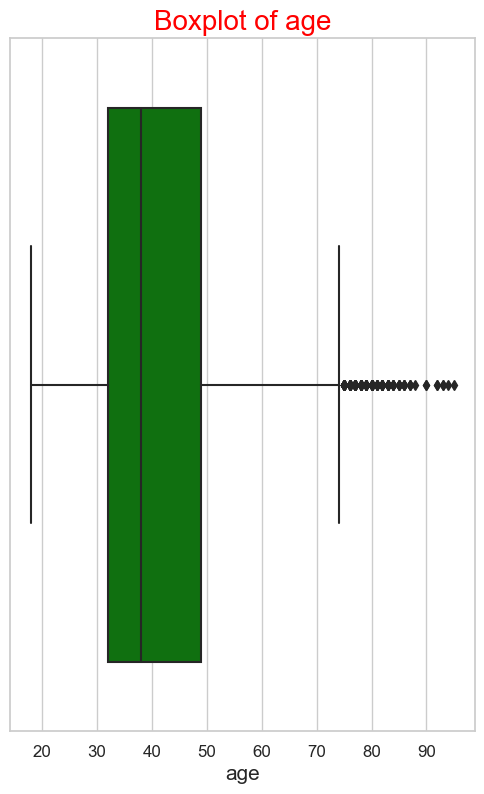

In [1721]:
plotFigureBoxPlot("age",dataset)

### Job

In [1722]:
jobCounts = dataset["job"].value_counts()
jobCounts

management       2369
blue-collar      1956
technician       1728
admin.           1266
services          837
retired           744
student           367
self-employed     364
unemployed        354
entrepreneur      286
housemaid         237
unknown            70
Name: job, dtype: int64

In [1723]:
jobCountsPercentage = dataset["job"].value_counts(normalize=True) * 100
jobCountsPercentage

management       22.395538
blue-collar      18.491208
technician       16.335791
admin.           11.968236
services          7.912649
retired           7.033466
student           3.469465
self-employed     3.441104
unemployed        3.346568
entrepreneur      2.703725
housemaid         2.240499
unknown           0.661751
Name: job, dtype: float64

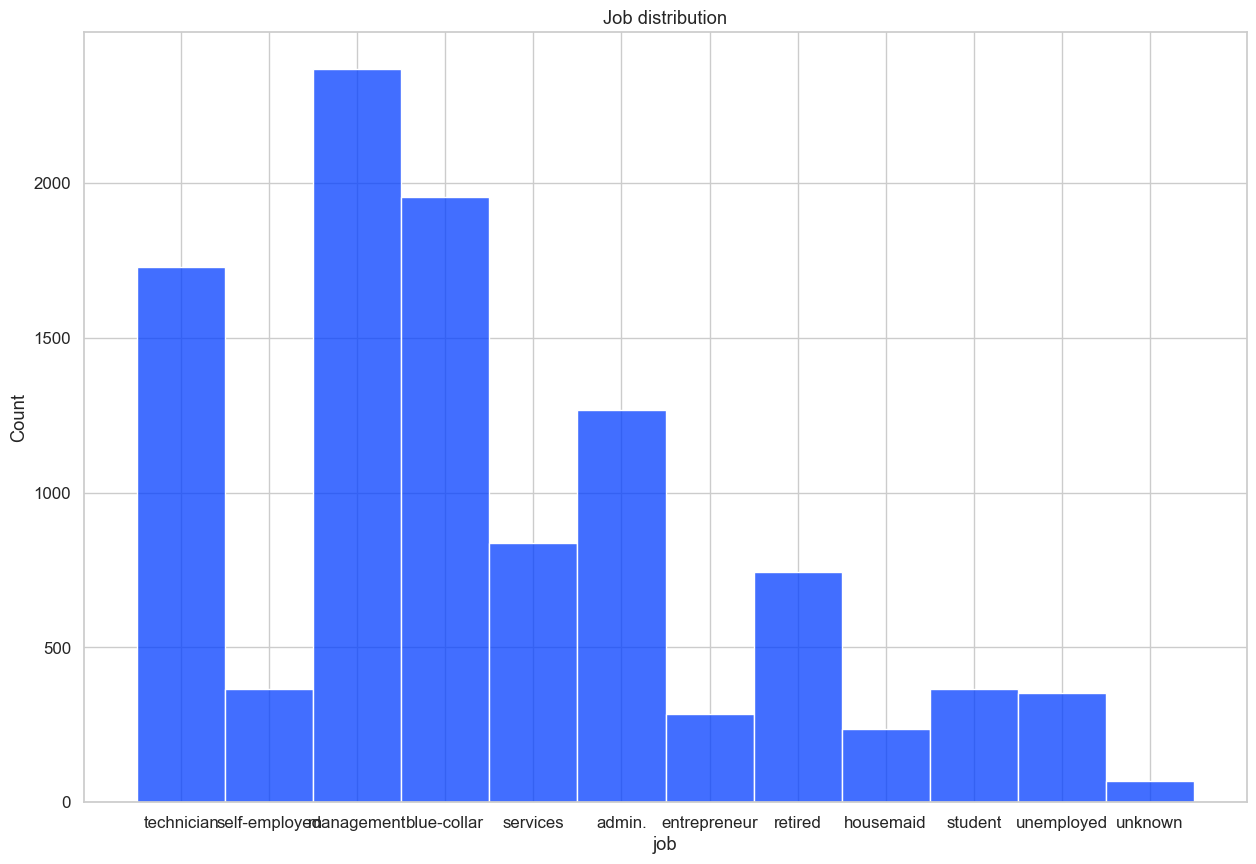

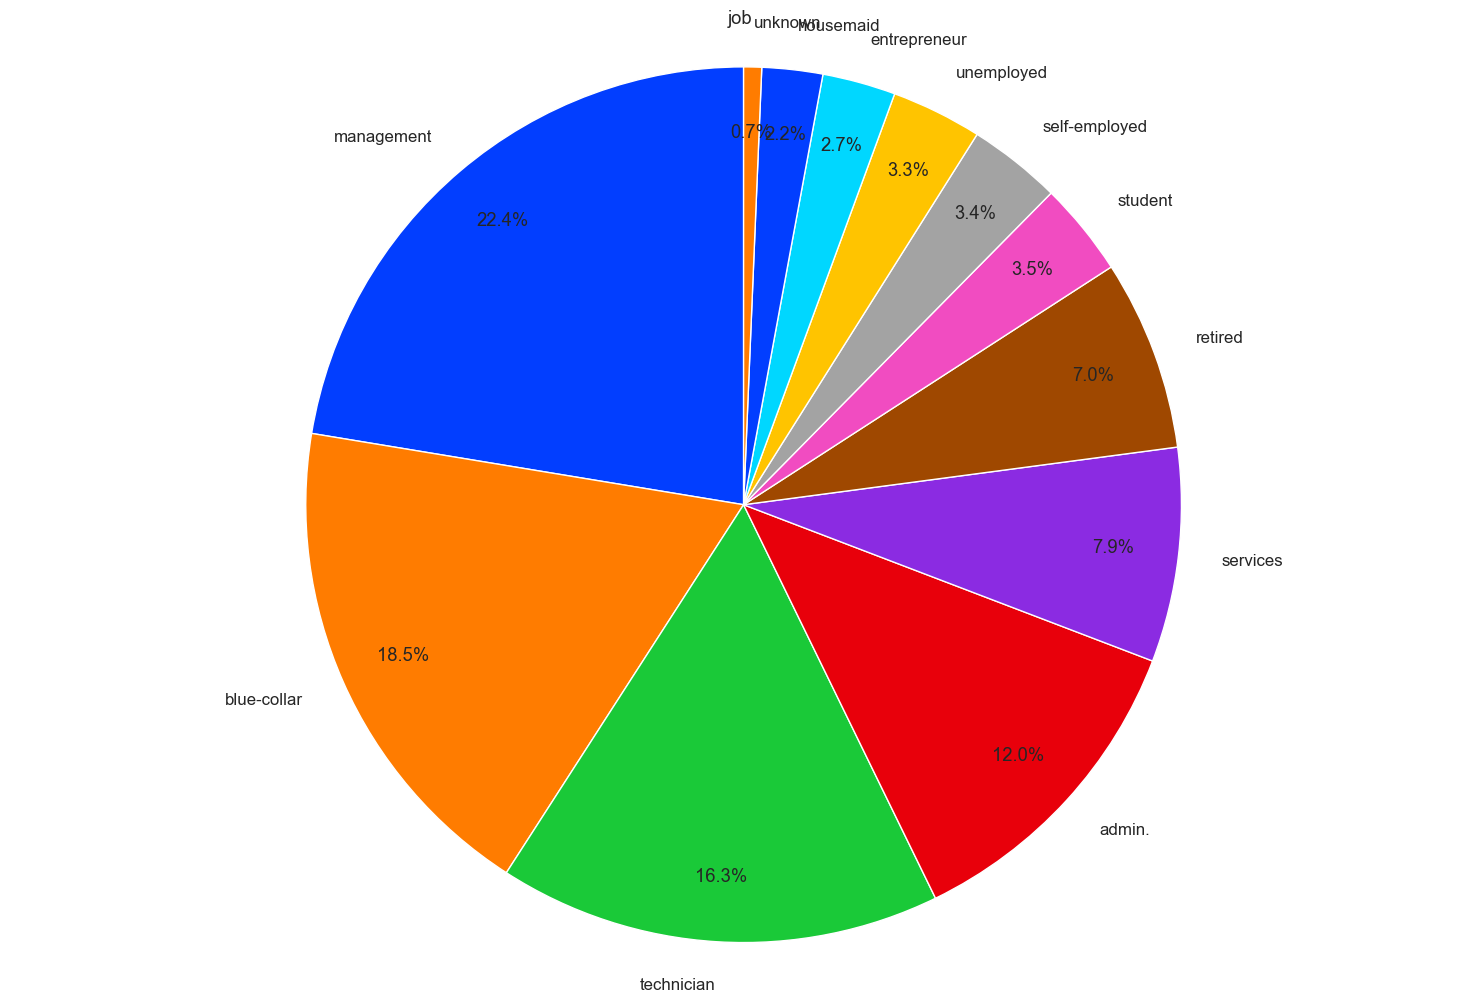

In [1724]:
plotBarChart(dataset, "job")

plotPieChart(jobCounts.tolist(), jobCounts.keys(), "job")

### Marital status

In [1725]:
maritalCounts = dataset["marital"].value_counts()
maritalCounts

married     5994
single      3370
divorced    1214
Name: marital, dtype: int64

In [1726]:
maritalCountsPercentage = dataset["marital"].value_counts(normalize=True) * 100
maritalCountsPercentage

married     56.664776
single      31.858574
divorced    11.476650
Name: marital, dtype: float64

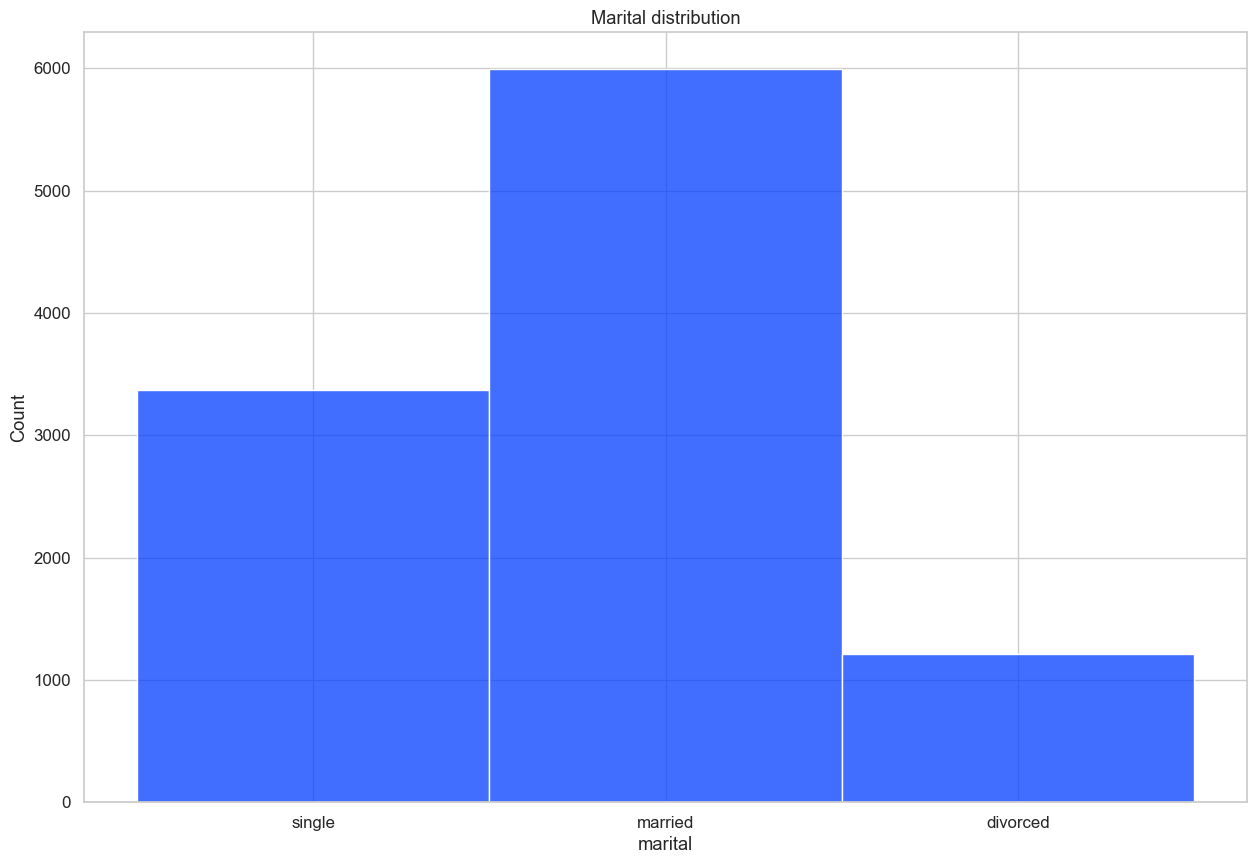

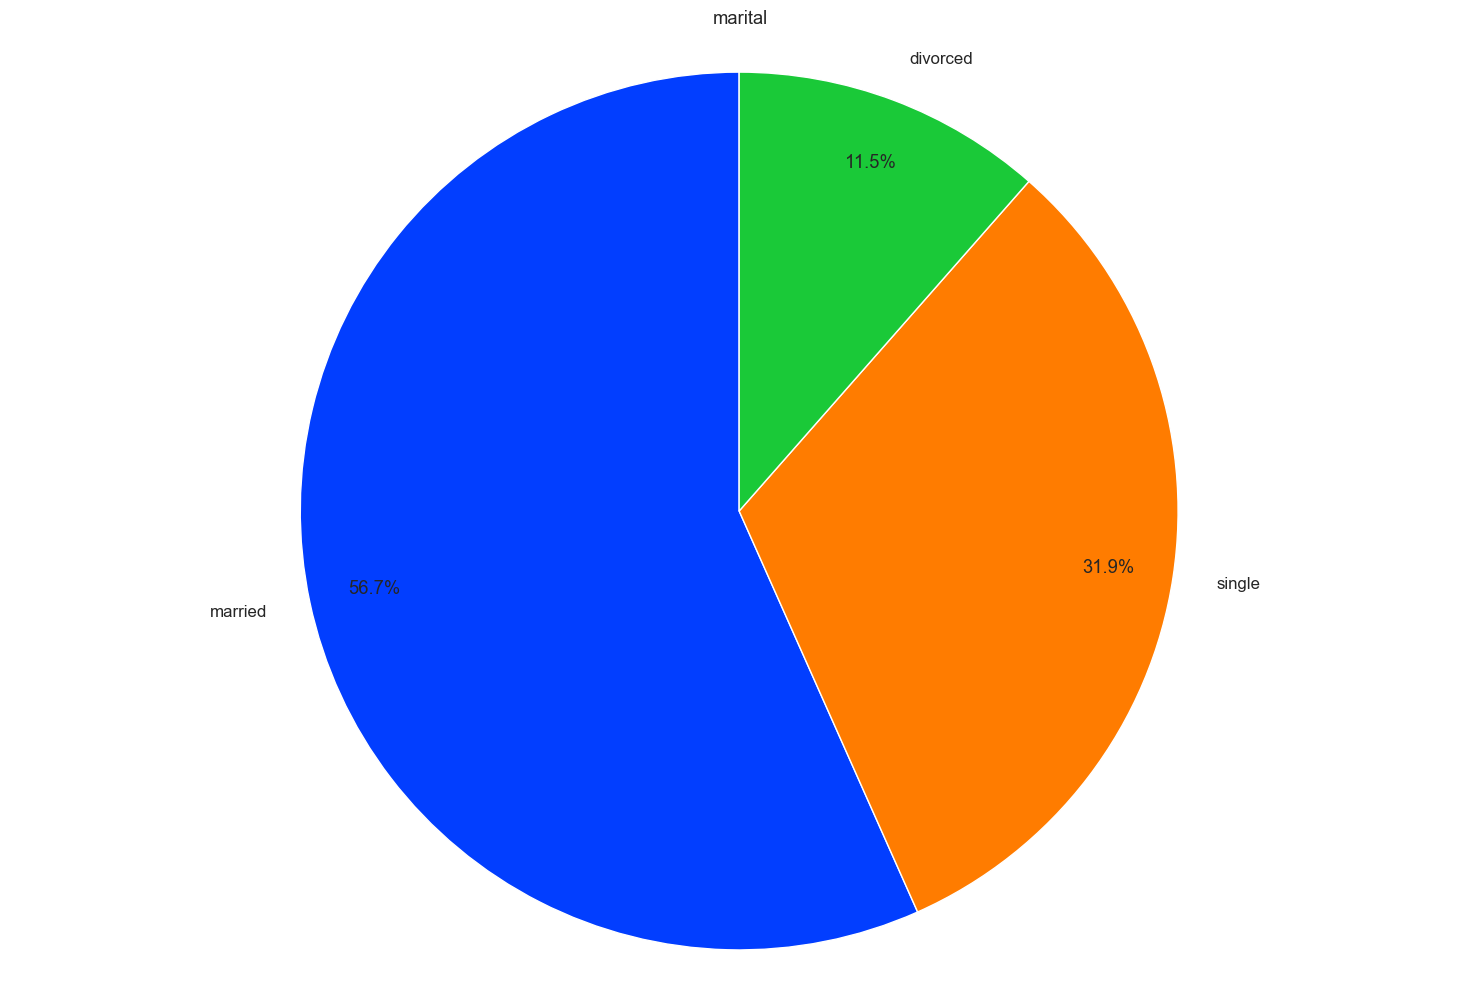

In [1727]:
plotBarChart(dataset, "marital")

plotPieChart(maritalCounts.tolist(), maritalCounts.keys(), "marital")

### Education

In [1728]:
educationCounts = dataset["education"].value_counts()
educationCounts

secondary    5209
tertiary     3448
primary      1436
unknown       485
Name: education, dtype: int64

In [1729]:
educationCountsPercentage = dataset["education"].value_counts(normalize=True) * 100
educationCountsPercentage

secondary    49.243713
tertiary     32.595954
primary      13.575345
unknown       4.584988
Name: education, dtype: float64

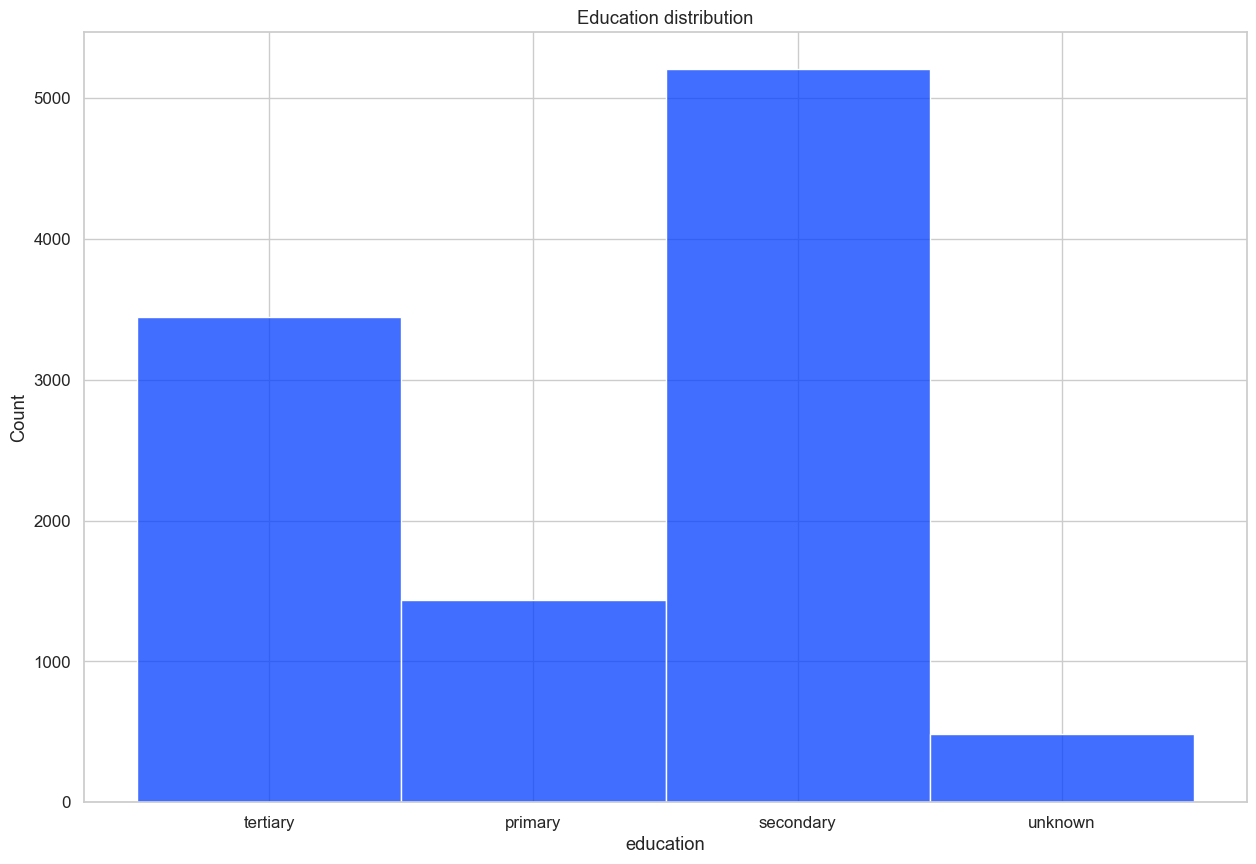

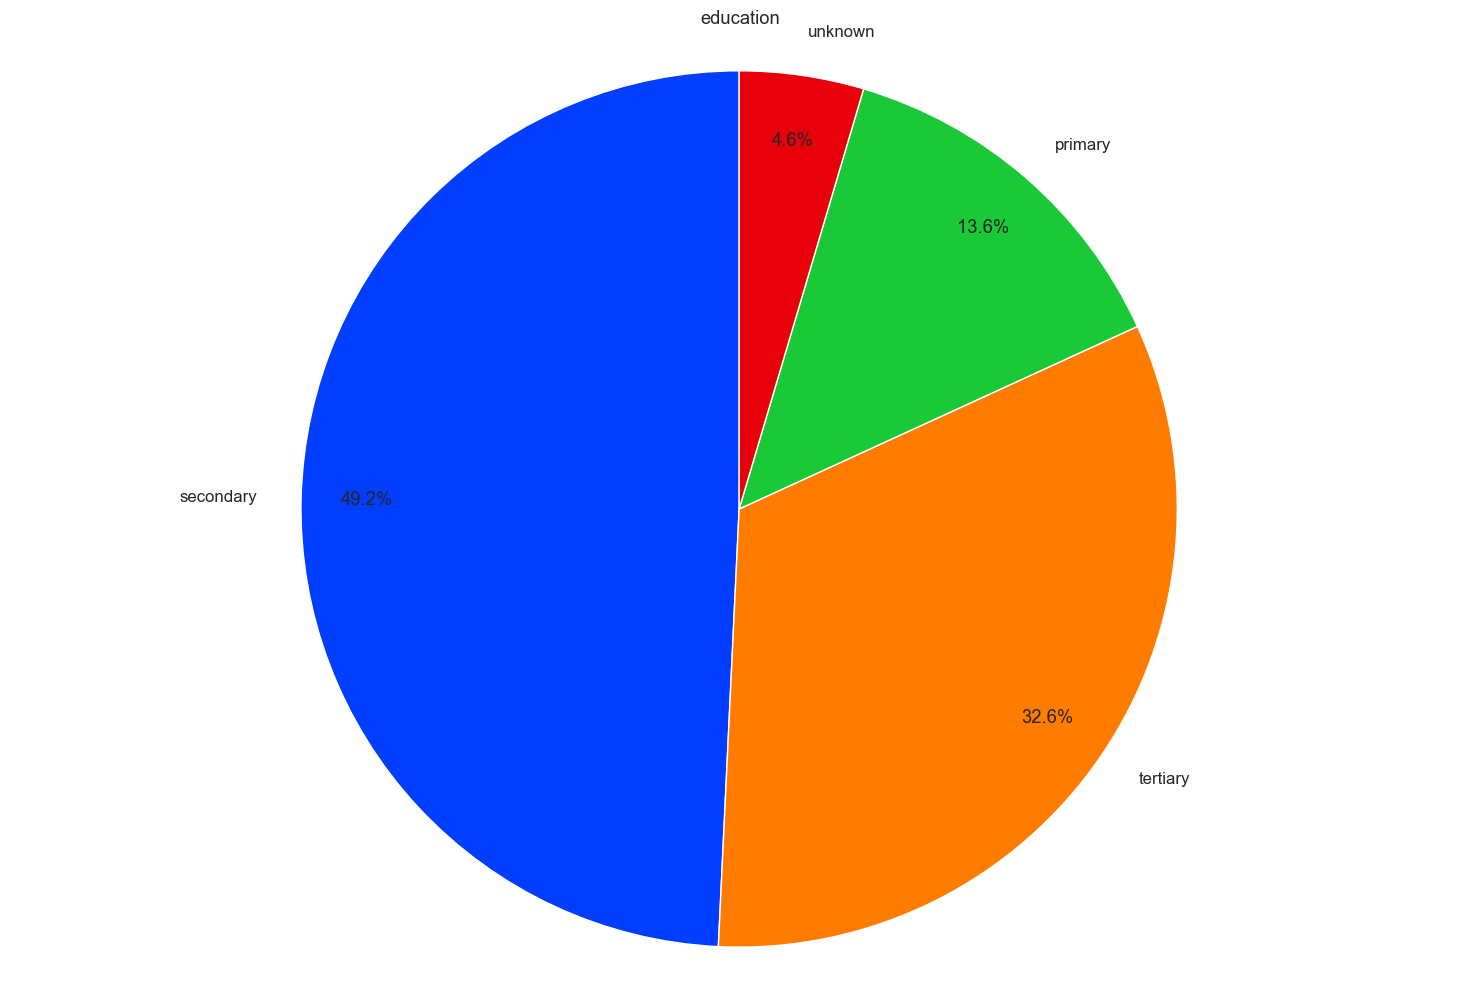

In [1730]:
plotBarChart(dataset, "education")

plotPieChart(educationCounts.tolist(), educationCounts.keys(), "education")

### Default

In [1731]:
defaultCounts = dataset["default"].value_counts()
defaultCounts

no     10424
yes      154
Name: default, dtype: int64

In [1732]:
defaultCountsPercentage = dataset["default"].value_counts(normalize=True) * 100
defaultCountsPercentage

no     98.544148
yes     1.455852
Name: default, dtype: float64

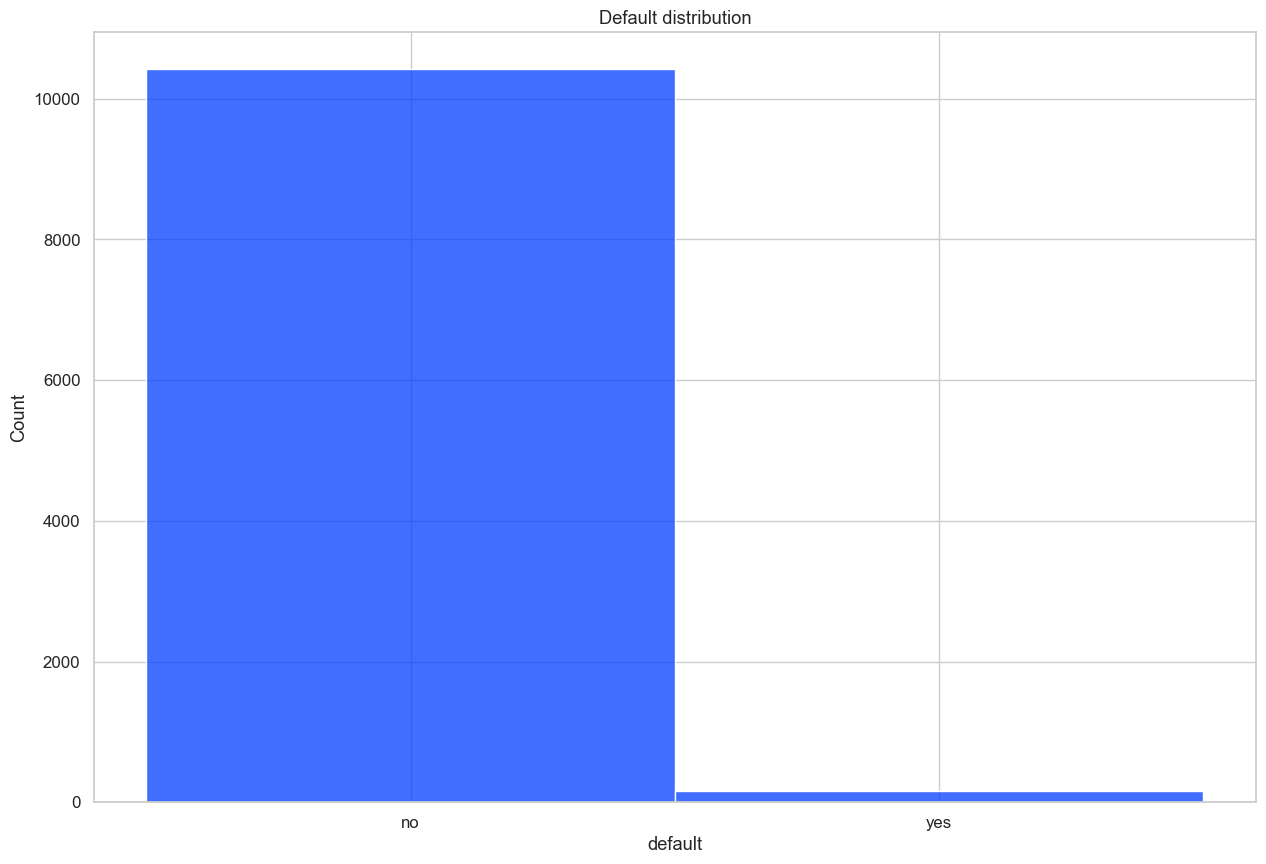

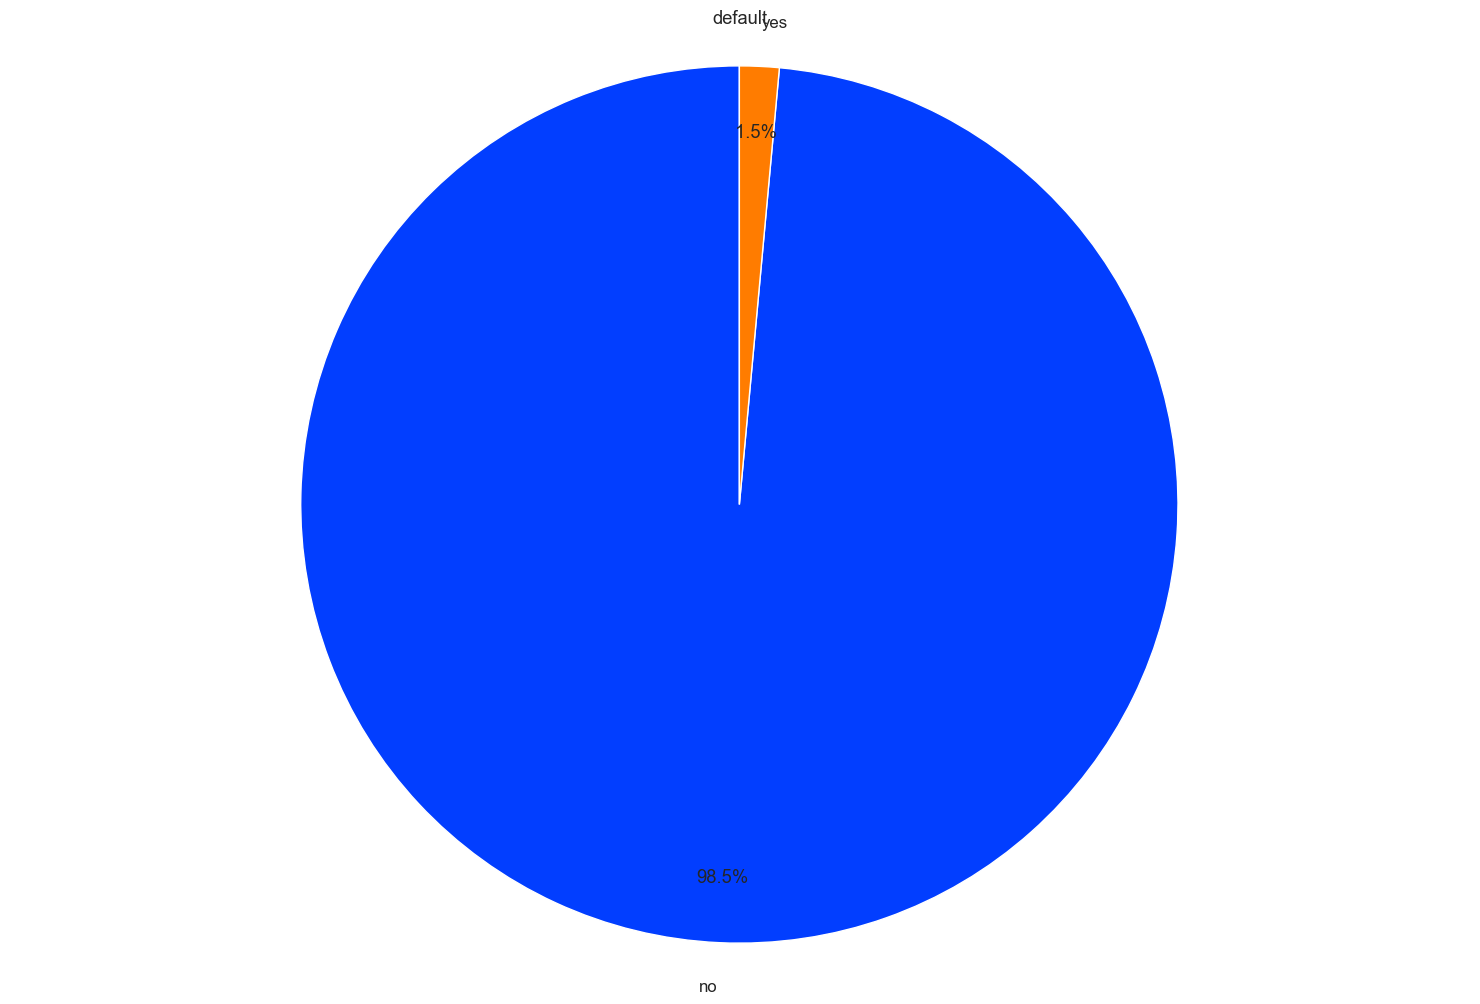

In [1733]:
plotBarChart(dataset, "default")

plotPieChart(defaultCounts.tolist(), defaultCounts.keys(), "default")

### Balance

In [1734]:
numericAnalysis("balance", dataset)

Mean:	 1582.1071090943467
Mode:	 0    0
Name: balance, dtype: int64
Median:	 570.5
Variance:	 11980566.932177974
Std deviation:	 3461.295556894553
Percentils (25, 50, 75):	 0.00     -6847.0
0.25       127.0
0.50       570.5
0.75      1765.0
1.00    102127.0
Name: balance, dtype: float64


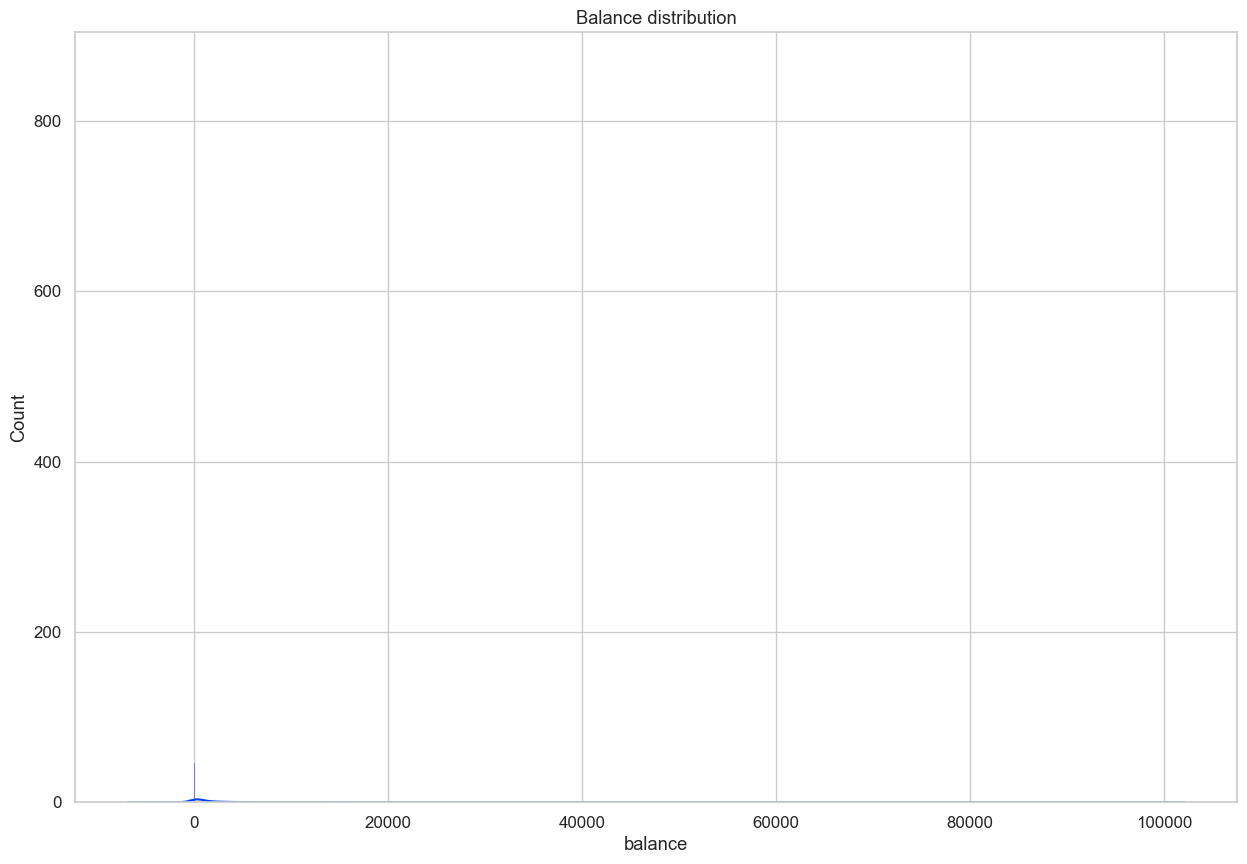

In [1735]:
plotBarChart(dataset, "balance")

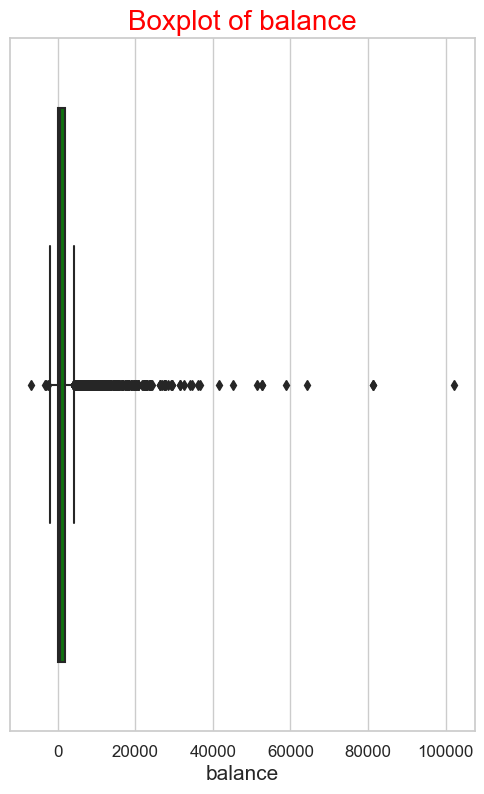

In [1736]:
plotFigureBoxPlot("balance",dataset)

In [1737]:
# VAMOS DAR DROP A TODAS AS LINHAS COM BALANCE NEGATIVO E VAMOS TAMBEM DAR DROP A LINHAS COM BALANCE MUITO ALTOS
dataset.drop(dataset[(dataset['balance']>40000)|(dataset['balance']<0)].index,inplace=True,axis=0)

### Housing

In [1738]:
defaultCounts = dataset["default"].value_counts()
defaultCounts

no     9820
yes      71
Name: default, dtype: int64

In [1739]:
defaultCountsPercentage = dataset["default"].value_counts(normalize=True) * 100
defaultCountsPercentage

no     99.282176
yes     0.717824
Name: default, dtype: float64

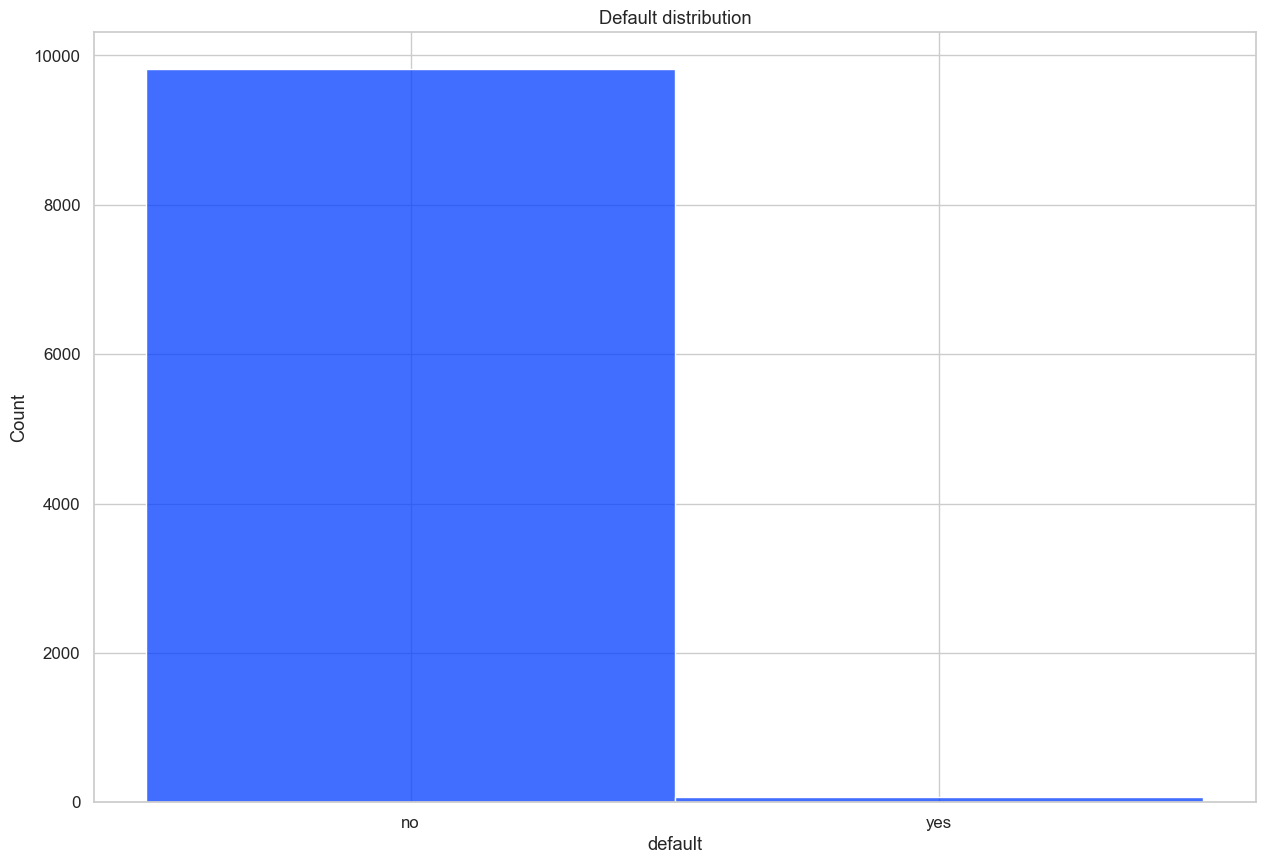

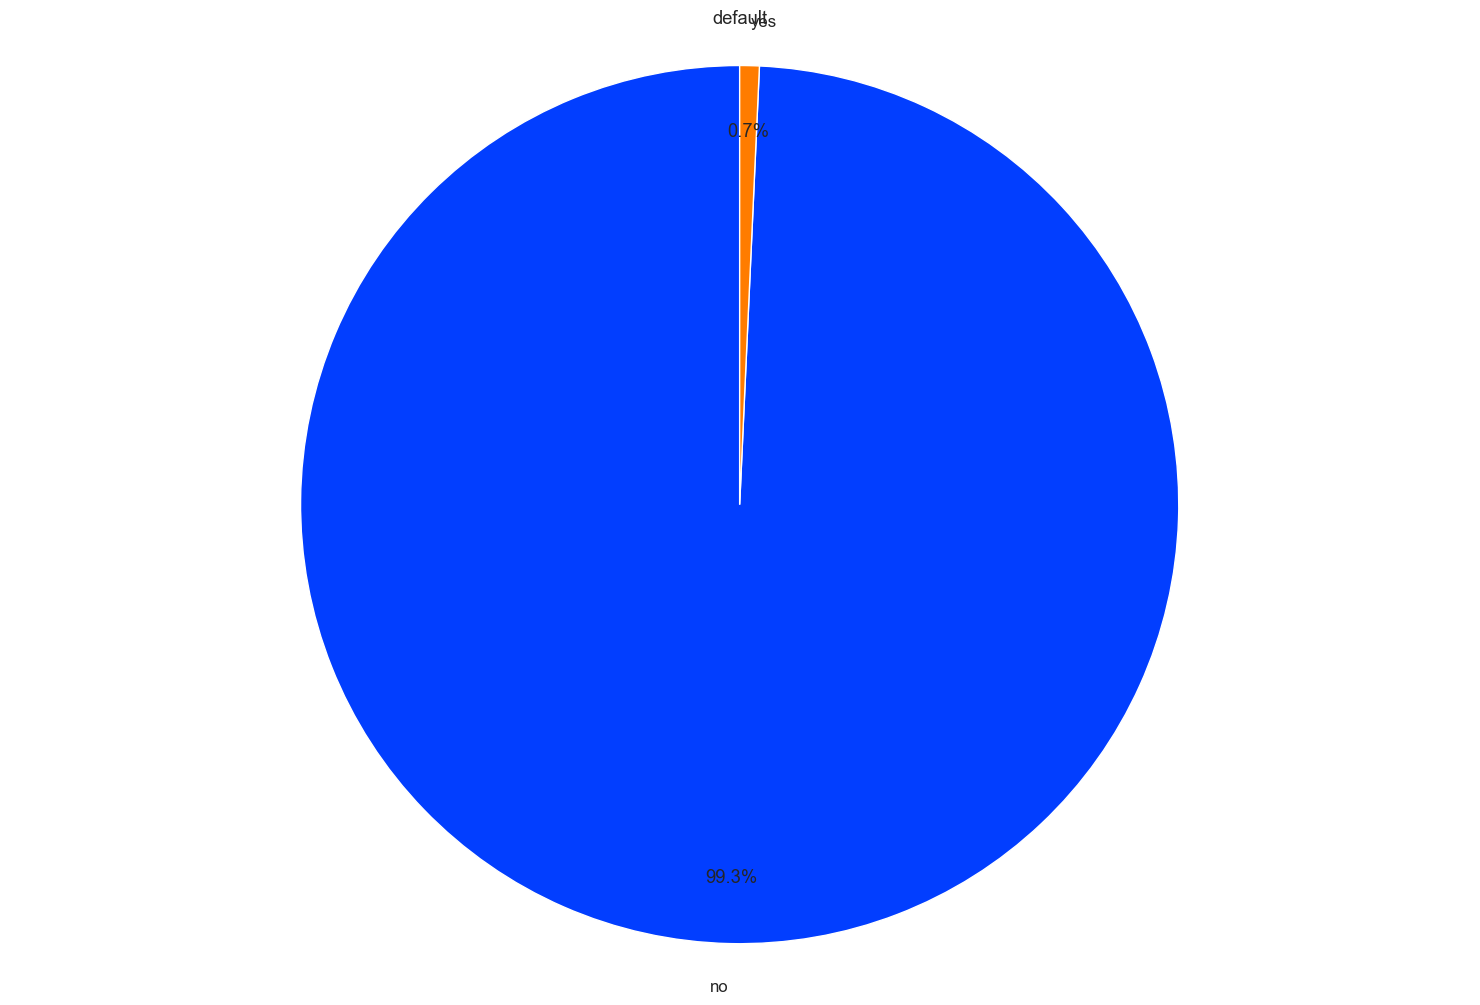

In [1740]:
plotBarChart(dataset, "default")

plotPieChart(defaultCounts.tolist(), defaultCounts.keys(), "default")

### Loan

In [1741]:
loanCounts = dataset["loan"].value_counts()
loanCounts

no     8760
yes    1131
Name: loan, dtype: int64

In [1742]:
loanCountsPercentage = dataset["loan"].value_counts(normalize=True) * 100
loanCountsPercentage

no     88.565362
yes    11.434638
Name: loan, dtype: float64

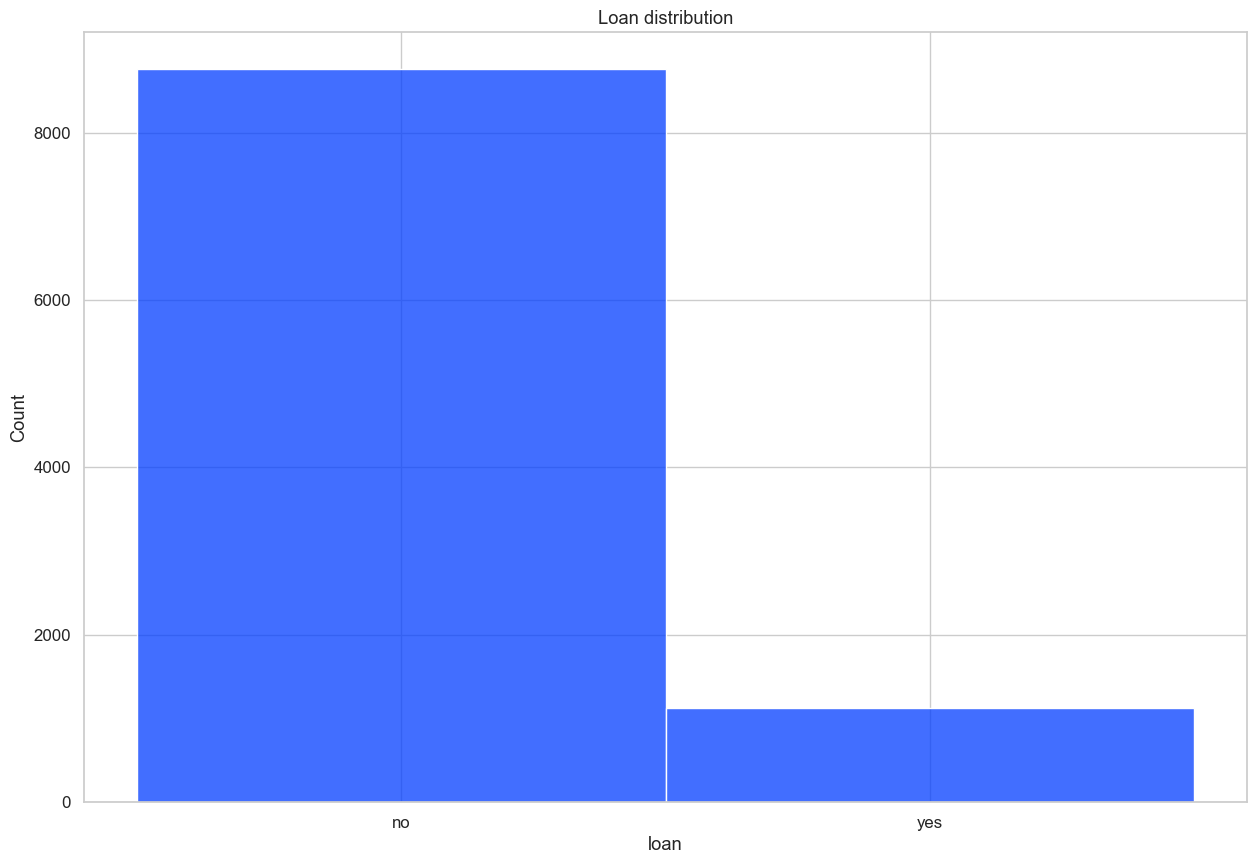

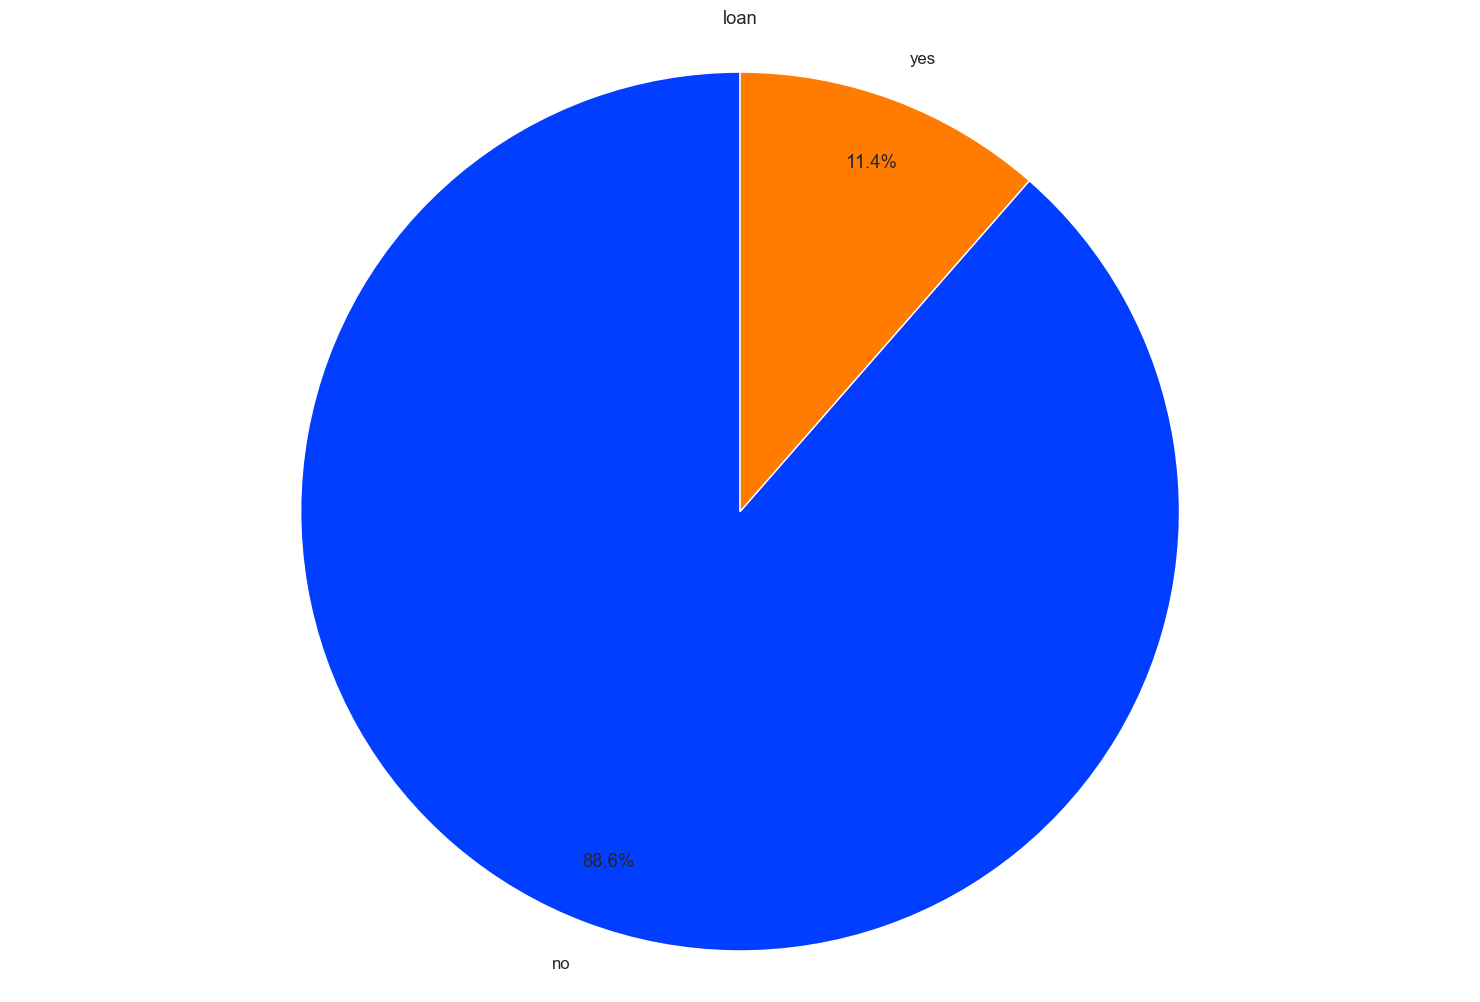

In [1743]:
plotBarChart(dataset, "loan")

plotPieChart(loanCounts.tolist(), loanCounts.keys(), "loan")

### Contact

In [1744]:
contactCounts = dataset["contact"].value_counts()
contactCounts

cellular     7217
unknown      1975
telephone     699
Name: contact, dtype: int64

In [1745]:
contactCountsPercentage = dataset["contact"].value_counts(normalize=True) * 100
contactCountsPercentage

cellular     72.965322
unknown      19.967647
telephone     7.067031
Name: contact, dtype: float64

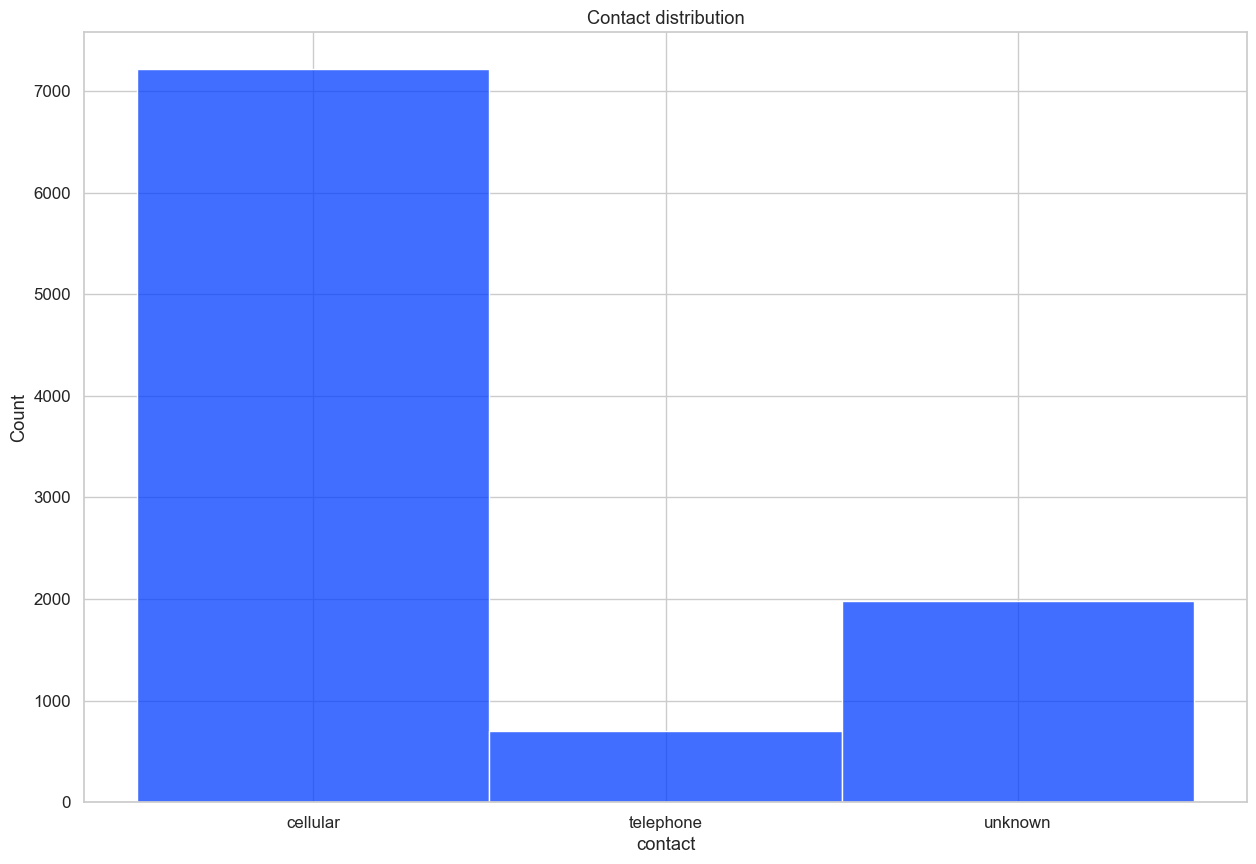

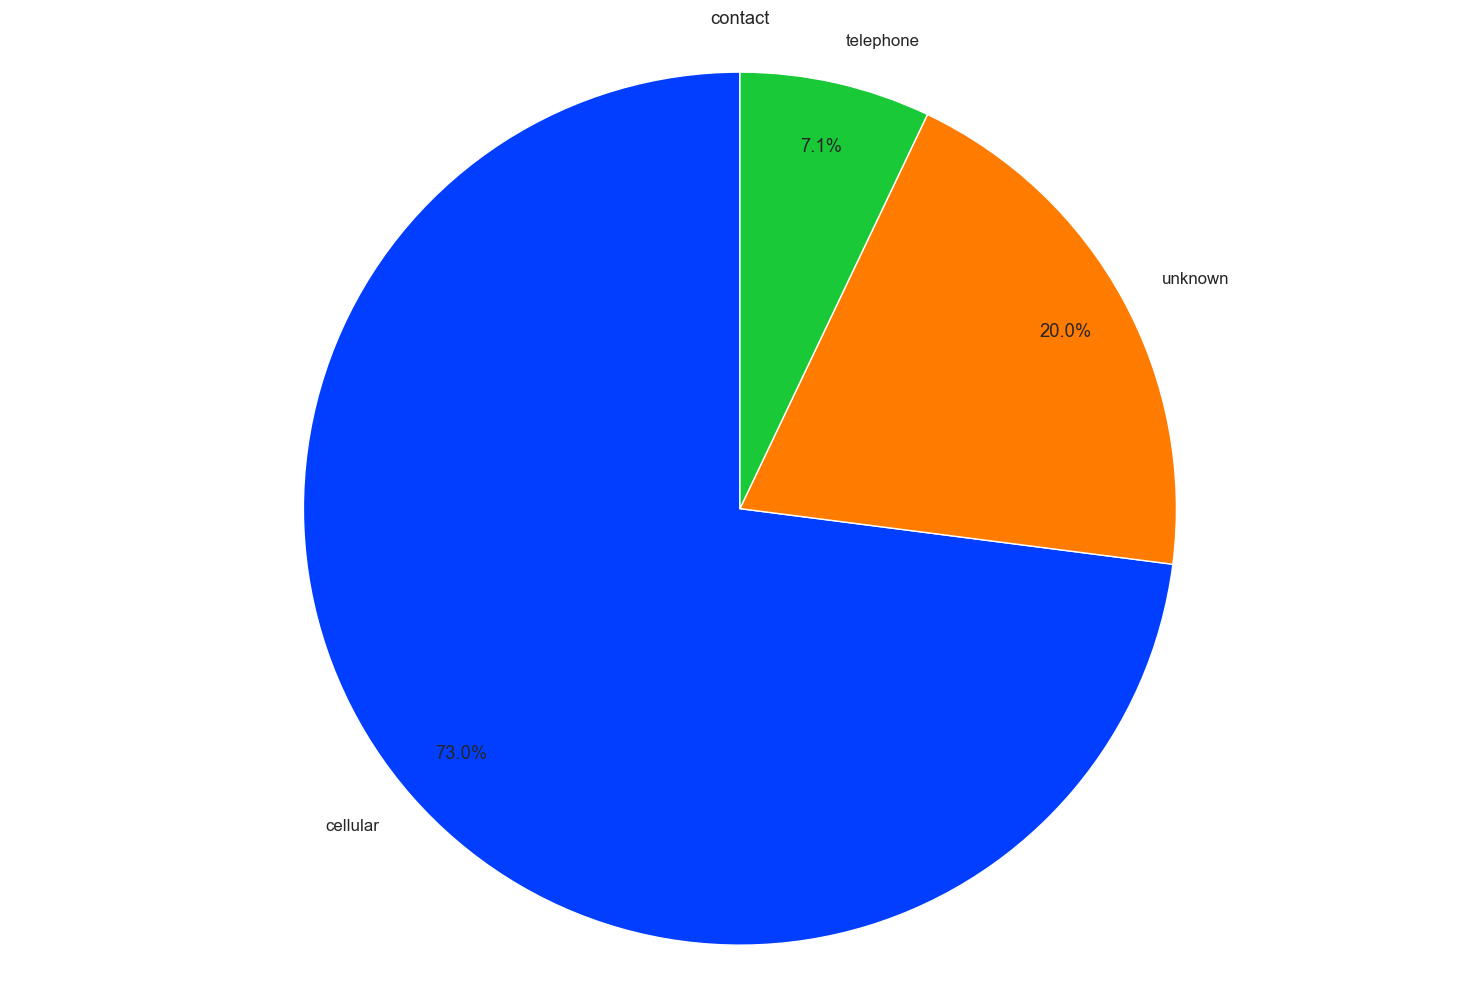

In [1746]:
plotBarChart(dataset, "contact")

plotPieChart(contactCounts.tolist(), contactCounts.keys(), "contact")

### Month

In [1747]:
monthCounts = dataset["month"].value_counts()
monthCounts

may    2347
aug    1394
jul    1308
jun    1100
apr     848
nov     830
feb     699
oct     375
sep     300
jan     291
mar     284
dec     115
Name: month, dtype: int64

In [1748]:
monthCountsPercentage = dataset["month"].value_counts(normalize=True) * 100
monthCountsPercentage

may    23.728642
aug    14.093620
jul    13.224143
jun    11.121221
apr     8.573451
nov     8.391467
feb     7.067031
oct     3.791325
sep     3.033060
jan     2.942069
mar     2.871297
dec     1.162673
Name: month, dtype: float64

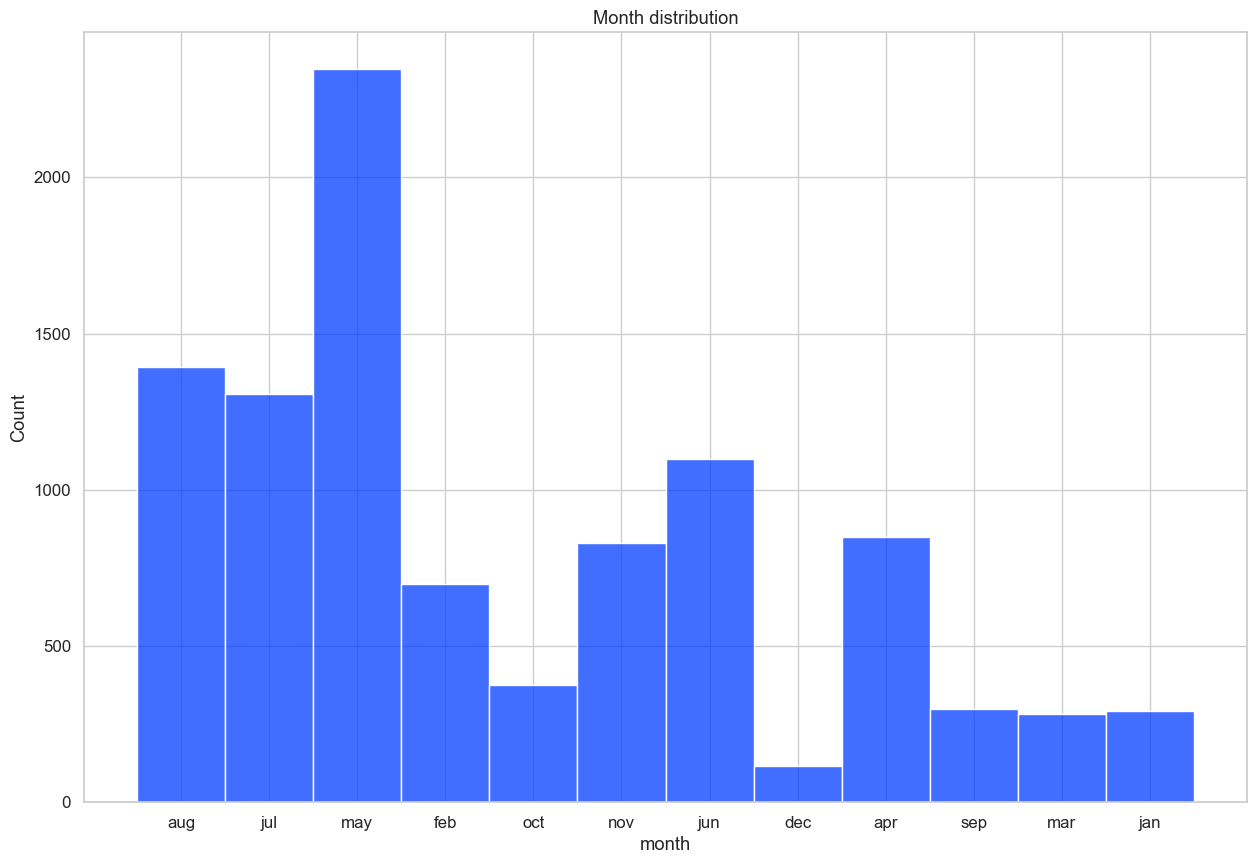

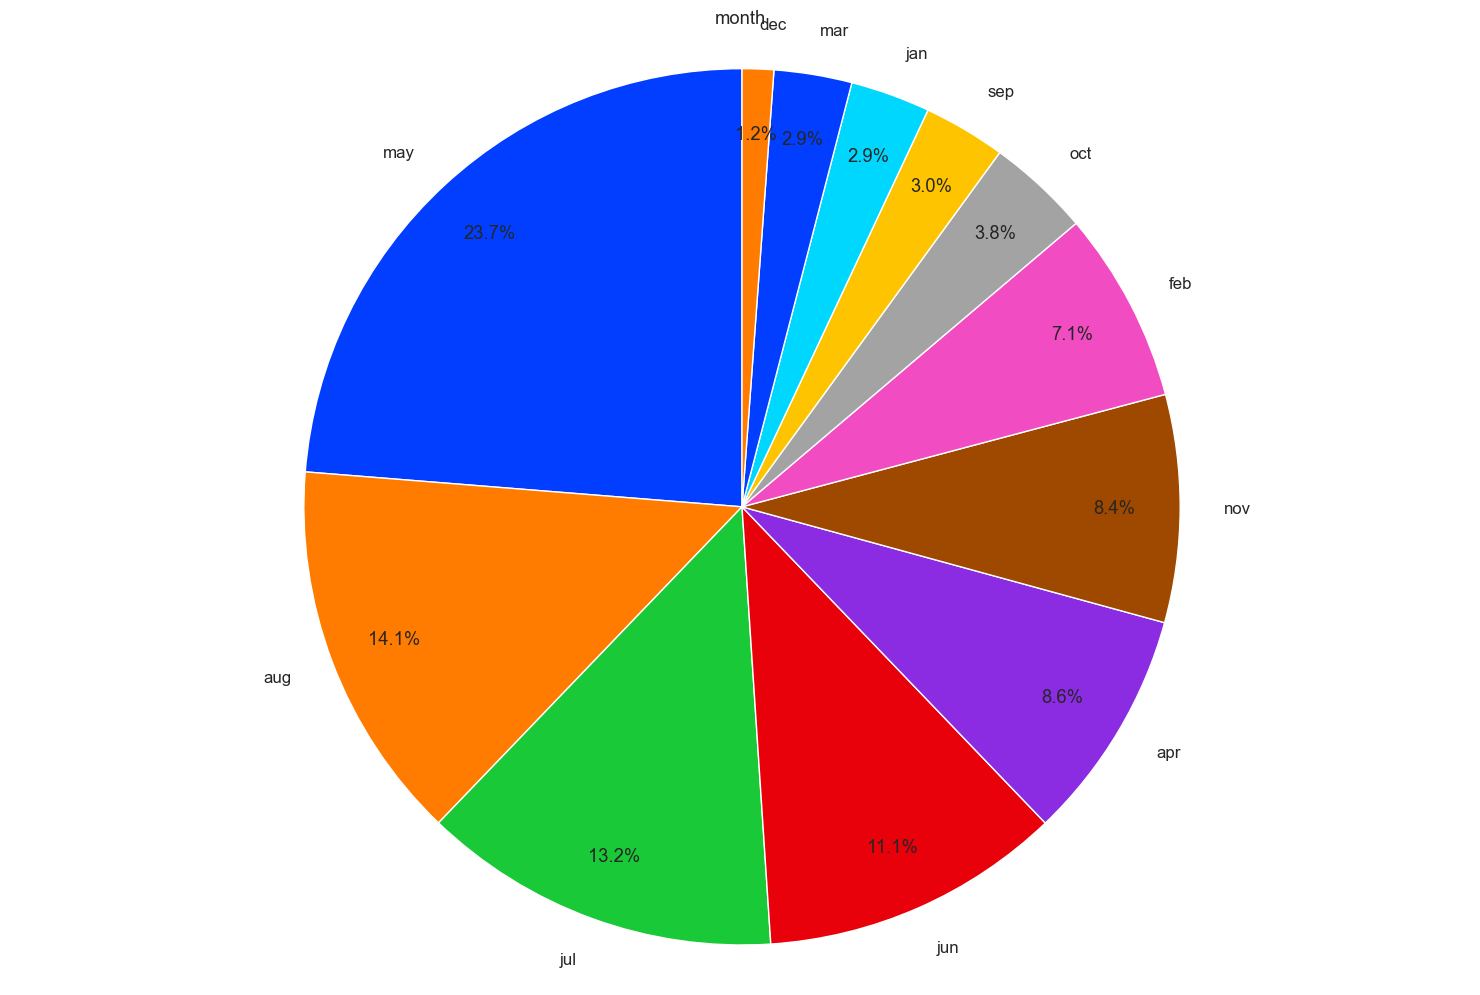

In [1749]:
plotBarChart(dataset, "month")

plotPieChart(monthCounts.tolist(), monthCounts.keys(), "month")

###Day

In [1750]:
daysCount = dataset["day"].value_counts()
daysCount

20    498
18    464
14    416
21    412
5     409
8     405
15    401
30    400
12    385
6     380
13    379
4     379
17    374
28    351
7     348
9     341
29    334
11    328
16    321
19    320
2     305
3     298
22    252
27    245
23    218
26    218
25    217
10    158
1     117
31    116
24    102
Name: day, dtype: int64

In [1751]:
dayCountsPercentage = dataset["day"].value_counts(normalize=True) * 100
dayCountsPercentage

20    5.034880
18    4.691133
14    4.205844
21    4.165403
5     4.135072
8     4.094631
15    4.054191
30    4.044080
12    3.892427
6     3.841876
13    3.831766
4     3.831766
17    3.781215
28    3.548681
7     3.518350
9     3.447579
29    3.376807
11    3.316146
16    3.245375
19    3.235264
2     3.083611
3     3.012840
22    2.547771
27    2.476999
23    2.204024
26    2.204024
25    2.193914
10    1.597412
1     1.182894
31    1.172783
24    1.031241
Name: day, dtype: float64

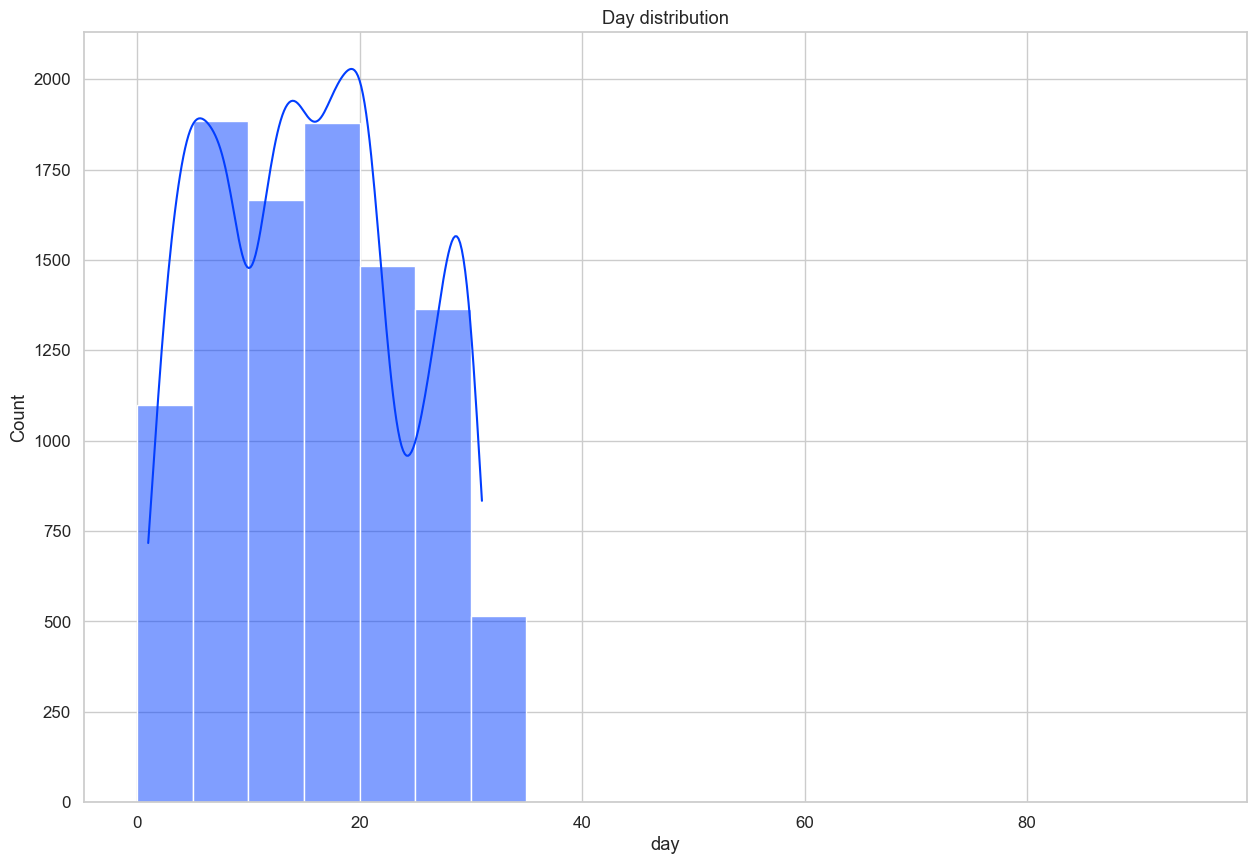

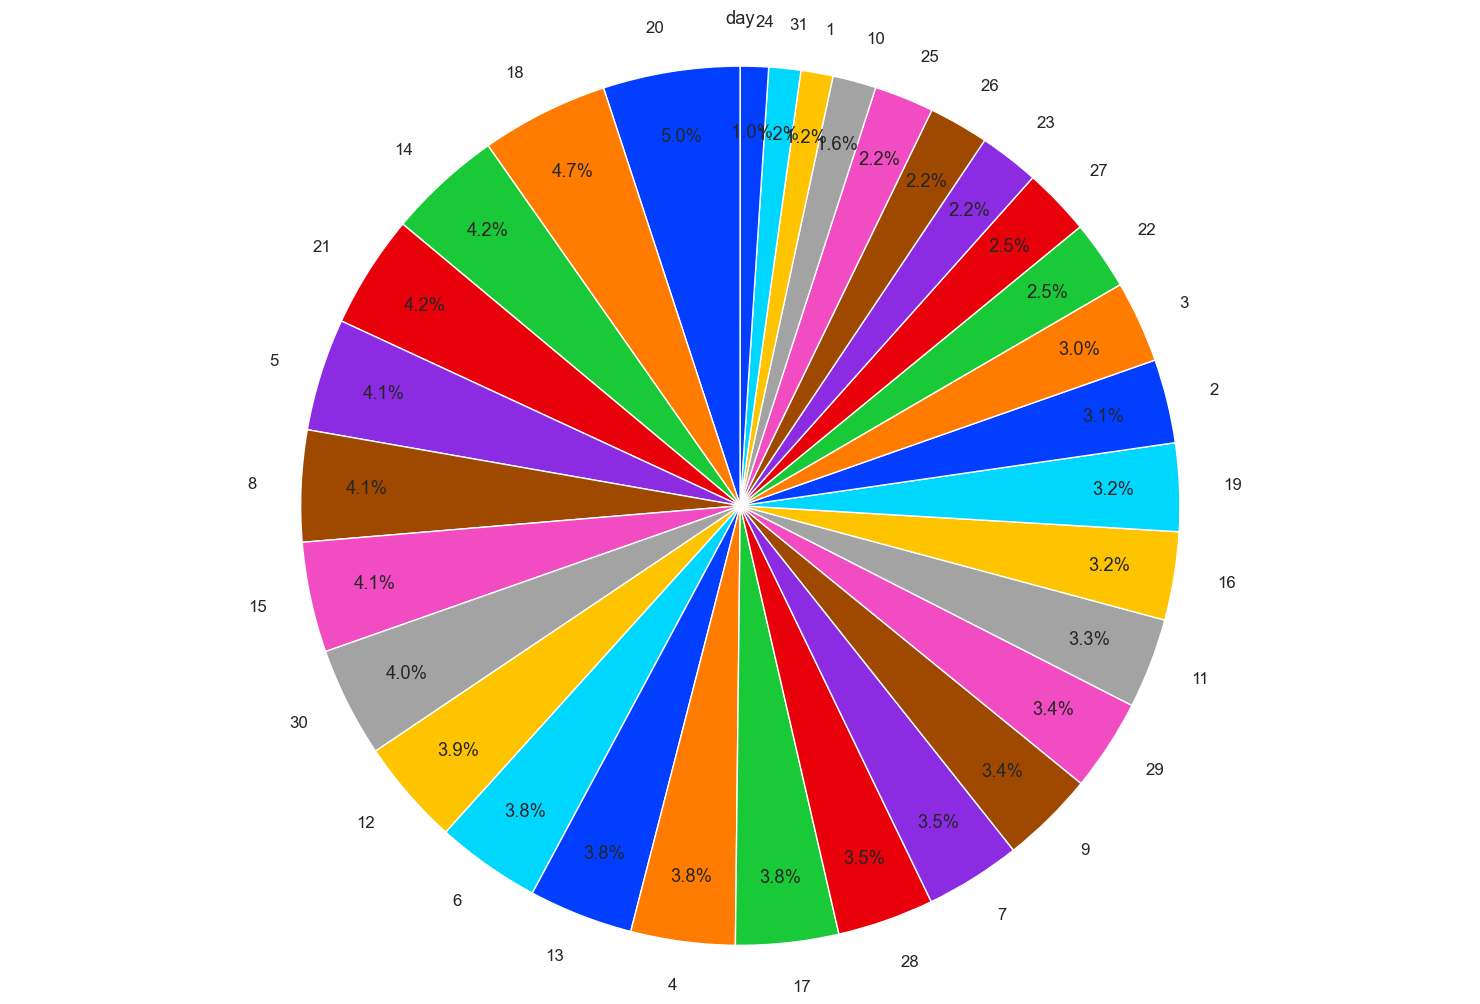

In [1752]:
plotBarChart(dataset, "day")

plotPieChart(daysCount.tolist(), daysCount.keys(), "day")

### Last contact duration

In [1753]:
numericAnalysis("duration", dataset)

Mean:	 376.2475988272167
Mode:	 0    226
Name: duration, dtype: int64
Median:	 259.0
Variance:	 119743.21442168596
Std deviation:	 346.03932496420975
Percentils (25, 50, 75):	 0.00       2.0
0.25     144.0
0.50     259.0
0.75     503.5
1.00    3881.0
Name: duration, dtype: float64


In [1754]:
durationCounts = dataset["duration"].value_counts()
durationCounts

226     36
97      35
135     34
117     33
153     32
        ..
1491     1
1441     1
1484     1
1204     1
1556     1
Name: duration, Length: 1404, dtype: int64

In [1755]:
durationCountsPercentage = dataset["duration"].value_counts(normalize=True) * 100
durationCountsPercentage

226     0.363967
97      0.353857
135     0.343747
117     0.333637
153     0.323526
          ...   
1491    0.010110
1441    0.010110
1484    0.010110
1204    0.010110
1556    0.010110
Name: duration, Length: 1404, dtype: float64

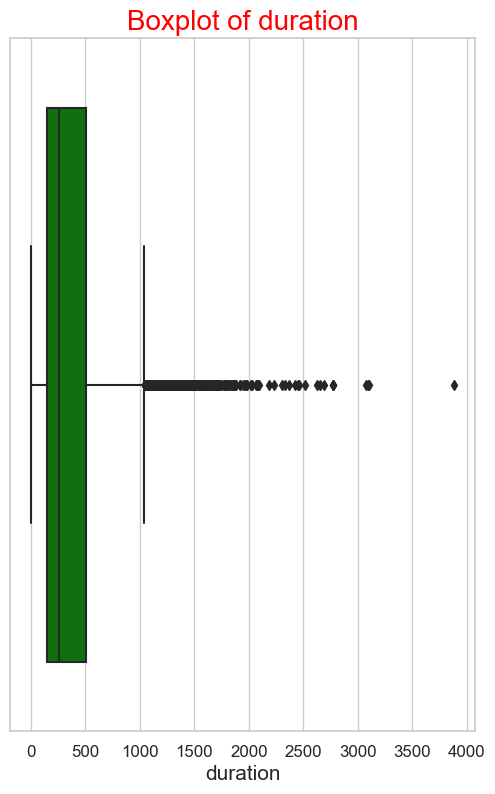

In [1756]:
plotFigureBoxPlot("duration", dataset);

# Remover outliers da duration apos analise do boxplot

In [1757]:
#Remove data where duration is bigger than 2500
dataset.drop(dataset[dataset['duration']>2500].index,inplace=True,axis=0)

### Campaign

In [1758]:
numericAnalysis("campaign", dataset)

Mean:	 2.482894736842105
Mode:	 0    1
Name: campaign, dtype: int64
Median:	 2.0
Variance:	 6.676091629772099
Std deviation:	 2.5838133891154174
Percentils (25, 50, 75):	 0.00     1.0
0.25     1.0
0.50     2.0
0.75     3.0
1.00    43.0
Name: campaign, dtype: float64


In [1759]:
maritalCounts = dataset["campaign"].value_counts()
maritalCounts

1     4269
2     2619
3     1207
4      710
5      325
6      258
7      126
8       94
9       49
10      44
11      34
13      24
12      21
14      14
17      14
16      12
15      11
18       8
19       7
21       6
20       5
29       4
23       3
22       3
37       2
28       2
24       2
43       1
30       1
26       1
31       1
27       1
25       1
32       1
Name: campaign, dtype: int64

In [1760]:
maritalCountsPercentage = dataset["campaign"].value_counts(normalize=True) * 100
maritalCountsPercentage

1     43.208502
2     26.508097
3     12.216599
4      7.186235
5      3.289474
6      2.611336
7      1.275304
8      0.951417
9      0.495951
10     0.445344
11     0.344130
13     0.242915
12     0.212551
14     0.141700
17     0.141700
16     0.121457
15     0.111336
18     0.080972
19     0.070850
21     0.060729
20     0.050607
29     0.040486
23     0.030364
22     0.030364
37     0.020243
28     0.020243
24     0.020243
43     0.010121
30     0.010121
26     0.010121
31     0.010121
27     0.010121
25     0.010121
32     0.010121
Name: campaign, dtype: float64

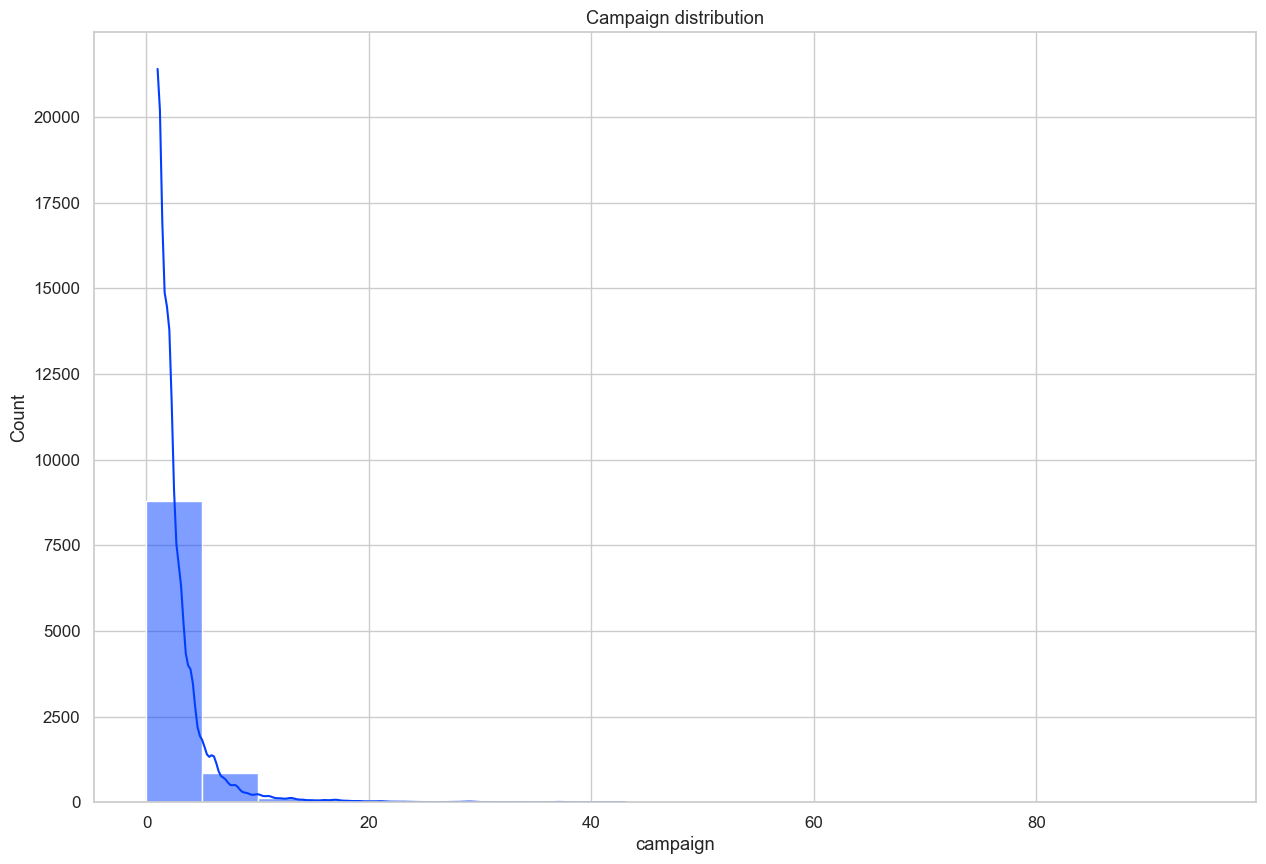

In [1761]:
plotBarChart(dataset, "campaign")

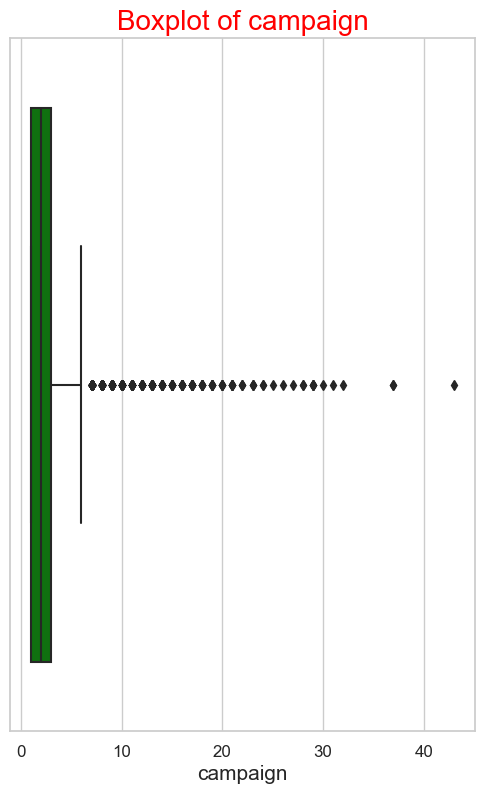

In [1762]:
plotFigureBoxPlot("campaign", dataset);

# Remover outliers da campaign apos analise do boxplot

In [1763]:
#Remove data where campaign is bigger than 35
dataset.drop(dataset[dataset['campaign']>35].index,axis=0,inplace=True)

### Pdays

In [1764]:
numericAnalysis("pdays", dataset)

Mean:	 52.299989875468256
Mode:	 0   -1
Name: pdays, dtype: int64
Median:	 -1.0
Variance:	 11769.323220939197
Std deviation:	 108.48651170048375
Percentils (25, 50, 75):	 0.00     -1.0
0.25     -1.0
0.50     -1.0
0.75     78.0
1.00    854.0
Name: pdays, dtype: float64


In [1765]:
pdaysCount = dataset["pdays"].value_counts()
pdaysCount

-1      7277
 92       97
 182      87
 91       80
 181      80
        ... 
 399       1
 395       1
 65        1
 20        1
 33        1
Name: pdays, Length: 462, dtype: int64

In [1766]:
pdaysCountPercentage = dataset["pdays"].value_counts(normalize=True) * 100
pdaysCountPercentage

-1      73.676217
 92      0.982080
 182     0.880834
 91      0.809963
 181     0.809963
          ...    
 399     0.010125
 395     0.010125
 65      0.010125
 20      0.010125
 33      0.010125
Name: pdays, Length: 462, dtype: float64

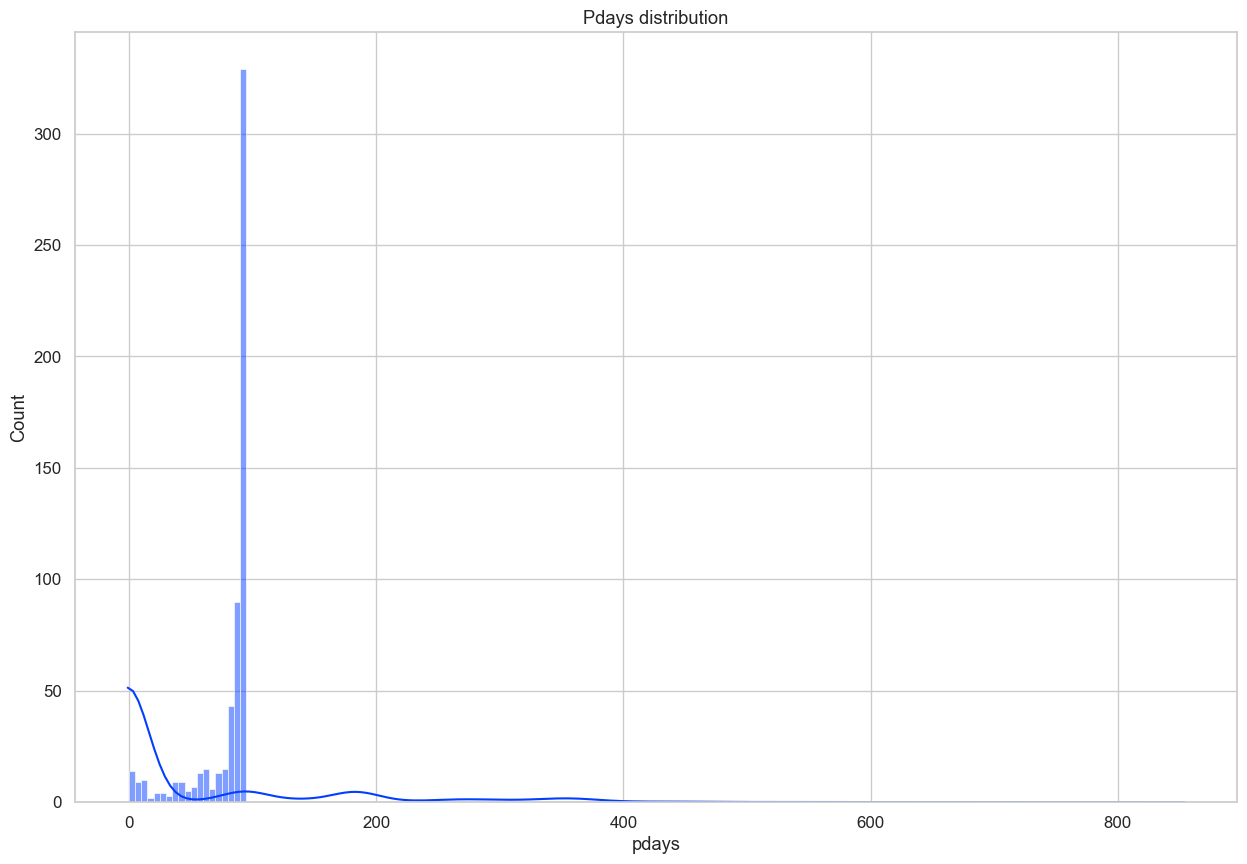

In [1767]:
plotBarChart(dataset, "pdays")

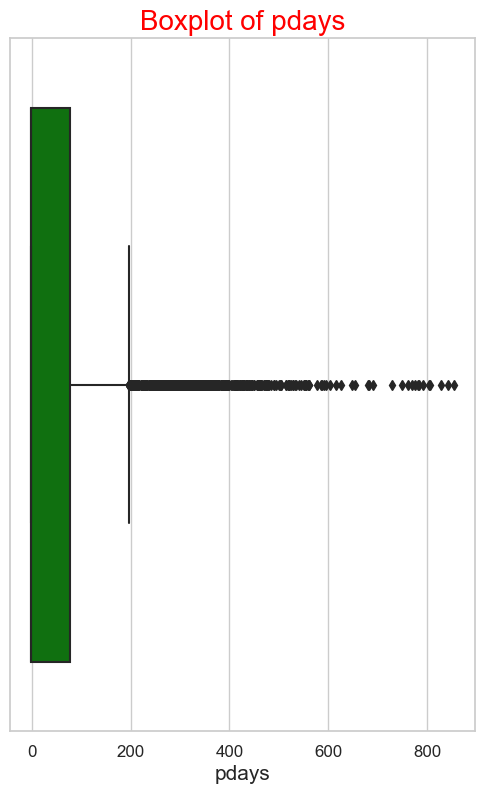

In [1768]:
plotFigureBoxPlot("pdays", dataset);

##Remover outlier pdays

In [1769]:
#Remove all pdays data
dataset.drop("pdays",inplace=True,axis=1)

### Previous

In [1770]:
numericAnalysis("previous", dataset)

Mean:	 0.8328439809658803
Mode:	 0    0
Name: previous, dtype: int64
Median:	 0.0
Variance:	 4.793542467858924
Std deviation:	 2.1894160106884493
Percentils (25, 50, 75):	 0.00     0.0
0.25     0.0
0.50     0.0
0.75     1.0
1.00    58.0
Name: previous, dtype: float64


In [1771]:
previousCounts = dataset["previous"].value_counts()
previousCounts

0     7277
1      836
2      633
3      393
4      230
5      162
6       93
7       65
8       50
10      33
9       27
11      20
12      14
13      12
14       6
17       4
23       3
22       3
19       3
15       3
20       2
21       2
16       1
29       1
30       1
58       1
26       1
55       1
Name: previous, dtype: int64

In [1772]:
previousCountsPercentage = dataset["previous"].value_counts(normalize=True) * 100
previousCountsPercentage

0     73.676217
1      8.464109
2      6.408829
3      3.978941
4      2.328642
5      1.640174
6      0.941581
7      0.658095
8      0.506227
10     0.334110
9      0.273362
11     0.202491
12     0.141743
13     0.121494
14     0.060747
17     0.040498
23     0.030374
22     0.030374
19     0.030374
15     0.030374
20     0.020249
21     0.020249
16     0.010125
29     0.010125
30     0.010125
58     0.010125
26     0.010125
55     0.010125
Name: previous, dtype: float64

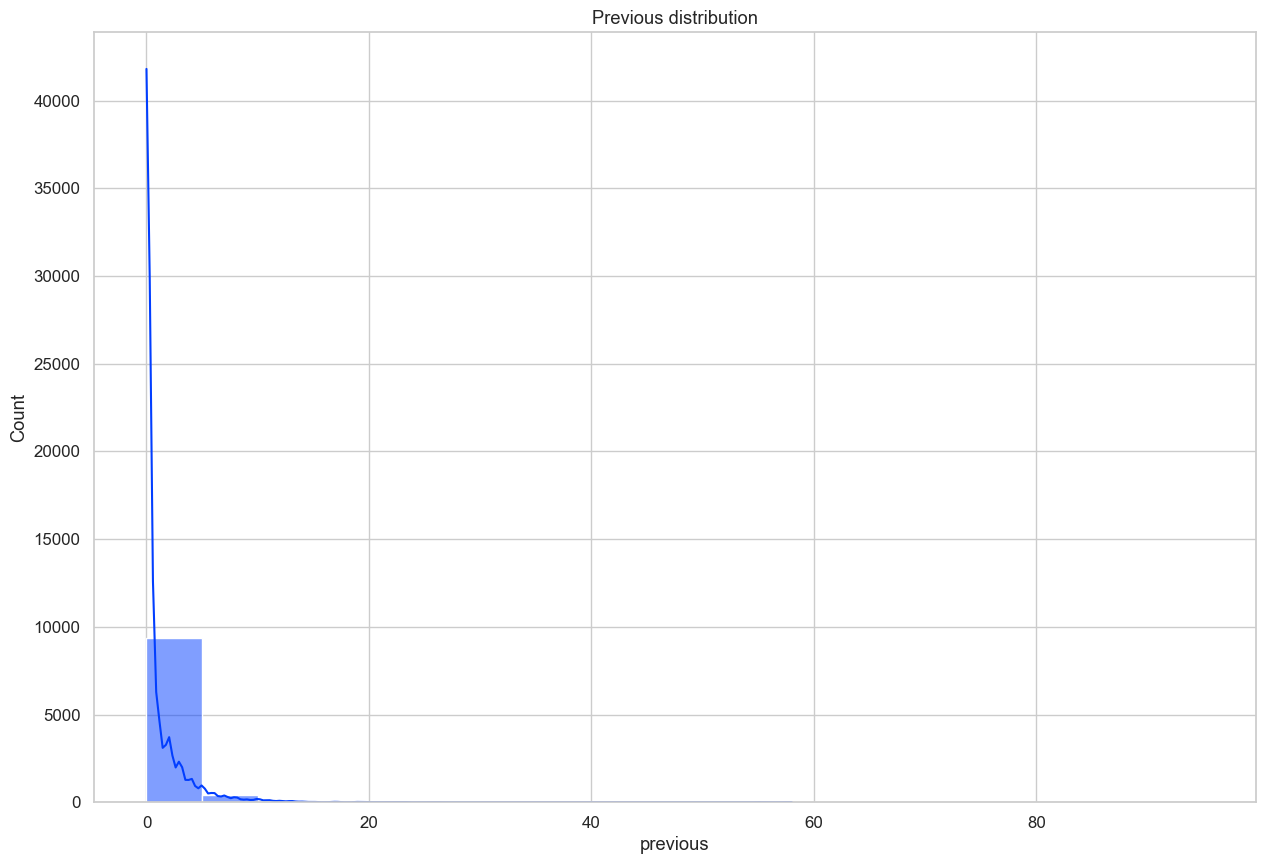

In [1773]:
plotBarChart(dataset, "previous")

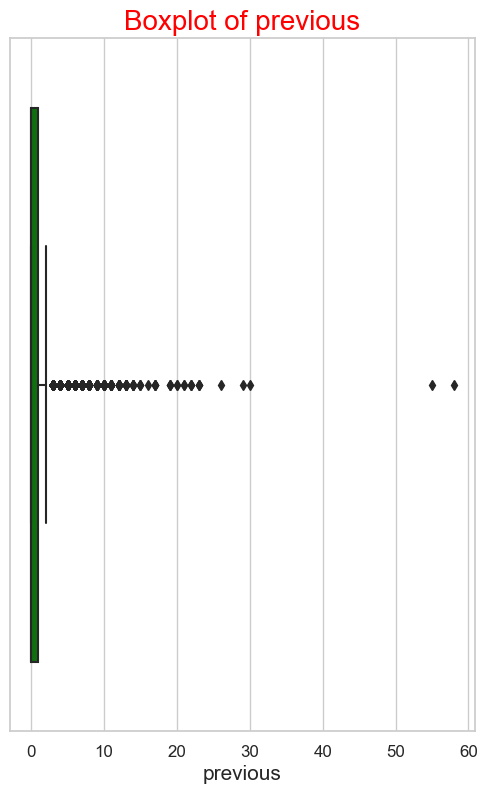

In [1774]:
plotFigureBoxPlot("previous", dataset);

# Remover outliers previous apos analise do boxplot

In [1775]:
#Remove all data where previous is bigger than 30
dataset.drop(dataset[dataset['previous']>30].index,axis=0,inplace=True)

### PoutCome

In [1776]:
poutcomeCounts = dataset["poutcome"].value_counts()
poutcomeCounts

unknown    7281
failure    1098
success    1032
other       464
Name: poutcome, dtype: int64

In [1777]:
poutcomeCountsPercentage = dataset["poutcome"].value_counts(normalize=True) * 100
poutcomeCountsPercentage

unknown    73.731646
failure    11.118987
success    10.450633
other       4.698734
Name: poutcome, dtype: float64

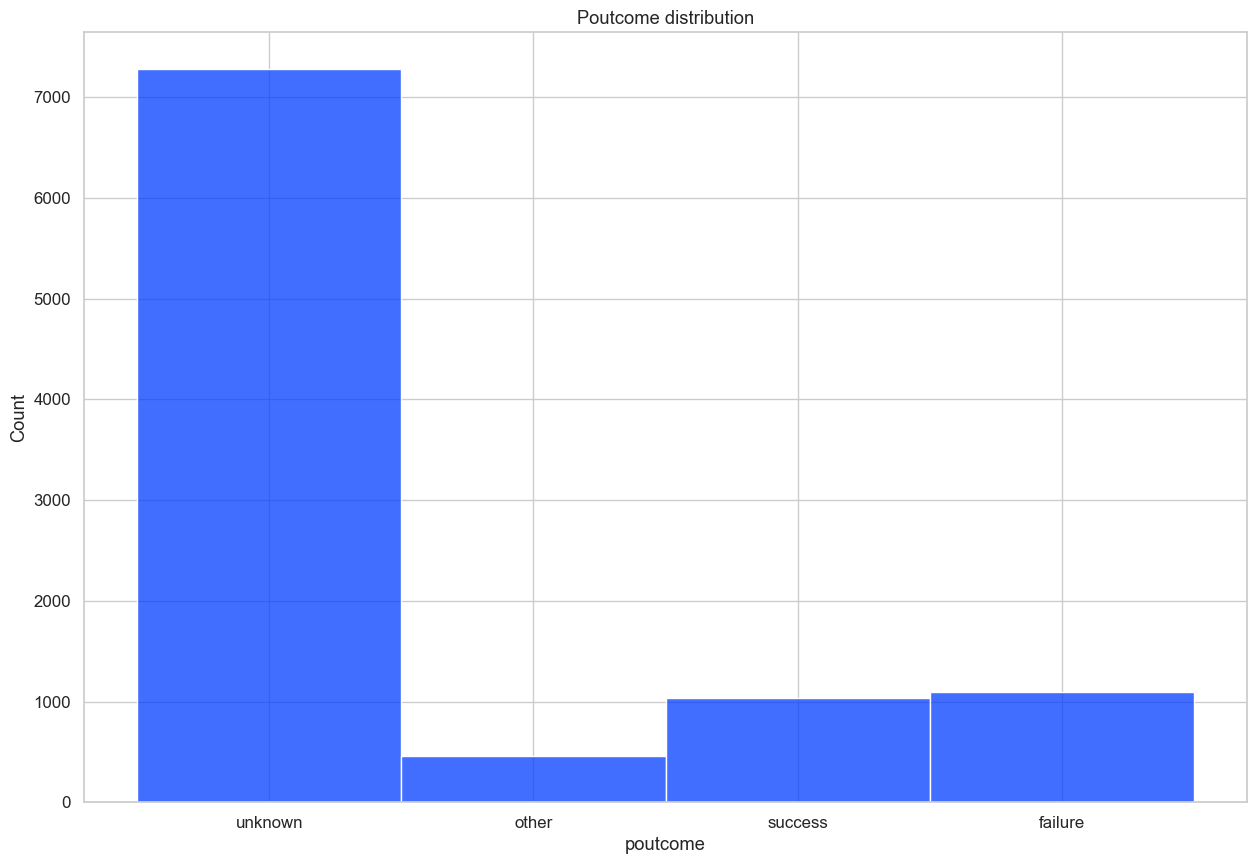

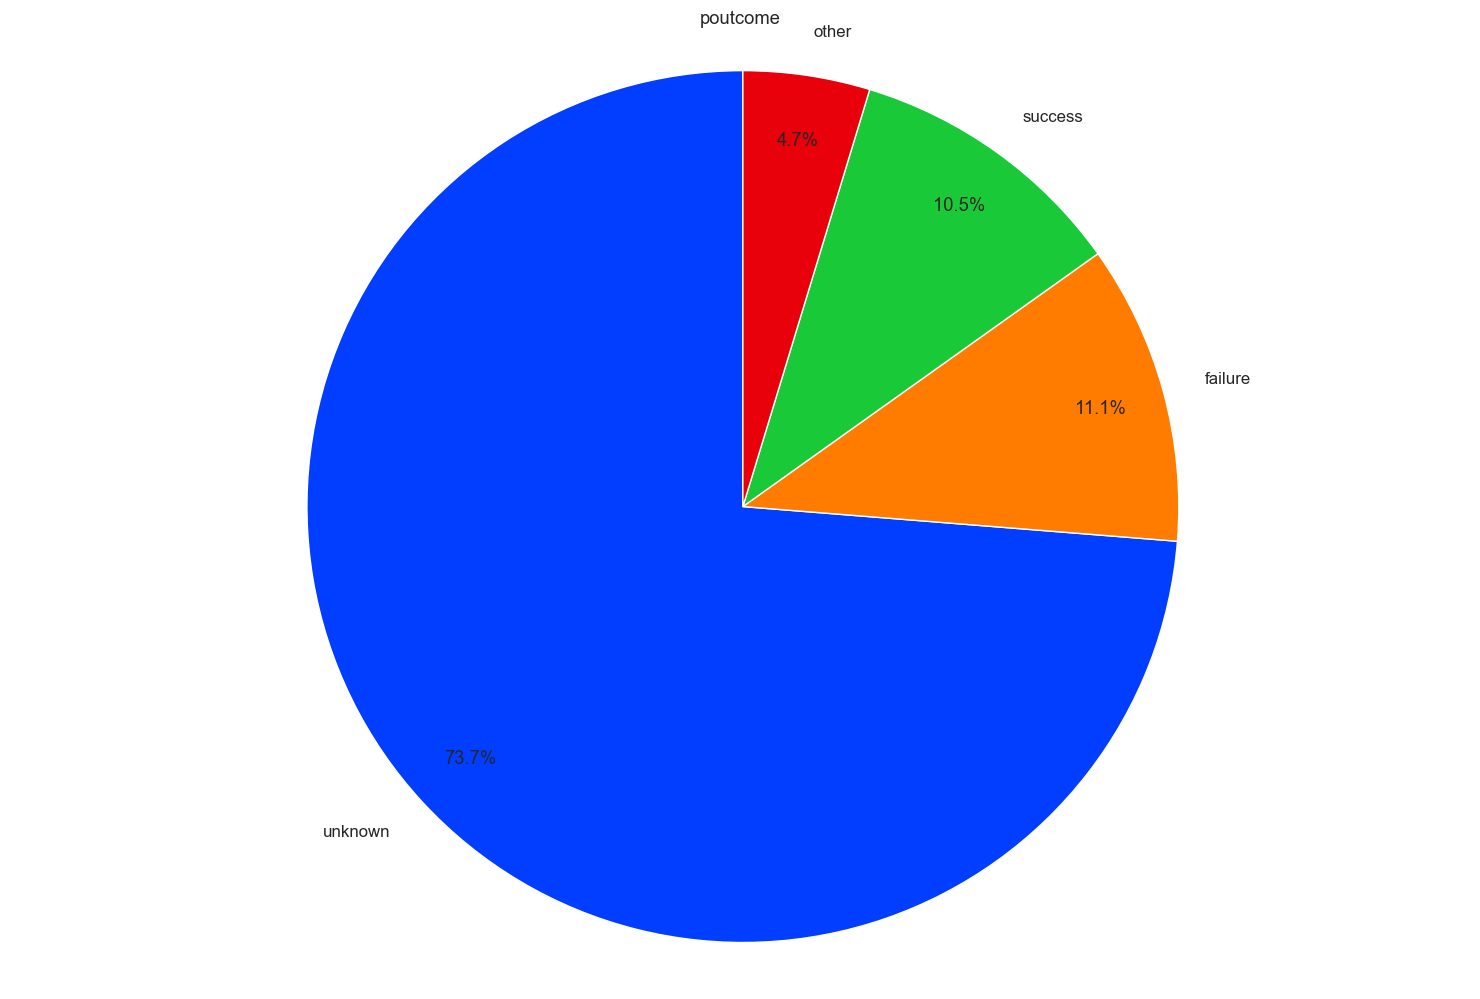

In [1778]:
plotBarChart(dataset, "poutcome")

plotPieChart(poutcomeCounts.tolist(), poutcomeCounts.keys(), "poutcome")

## Categoric features analisys in relation to target

In [1779]:
#divide data
datasetCat = dataset.select_dtypes(include='object').columns.drop(["y", "job"])

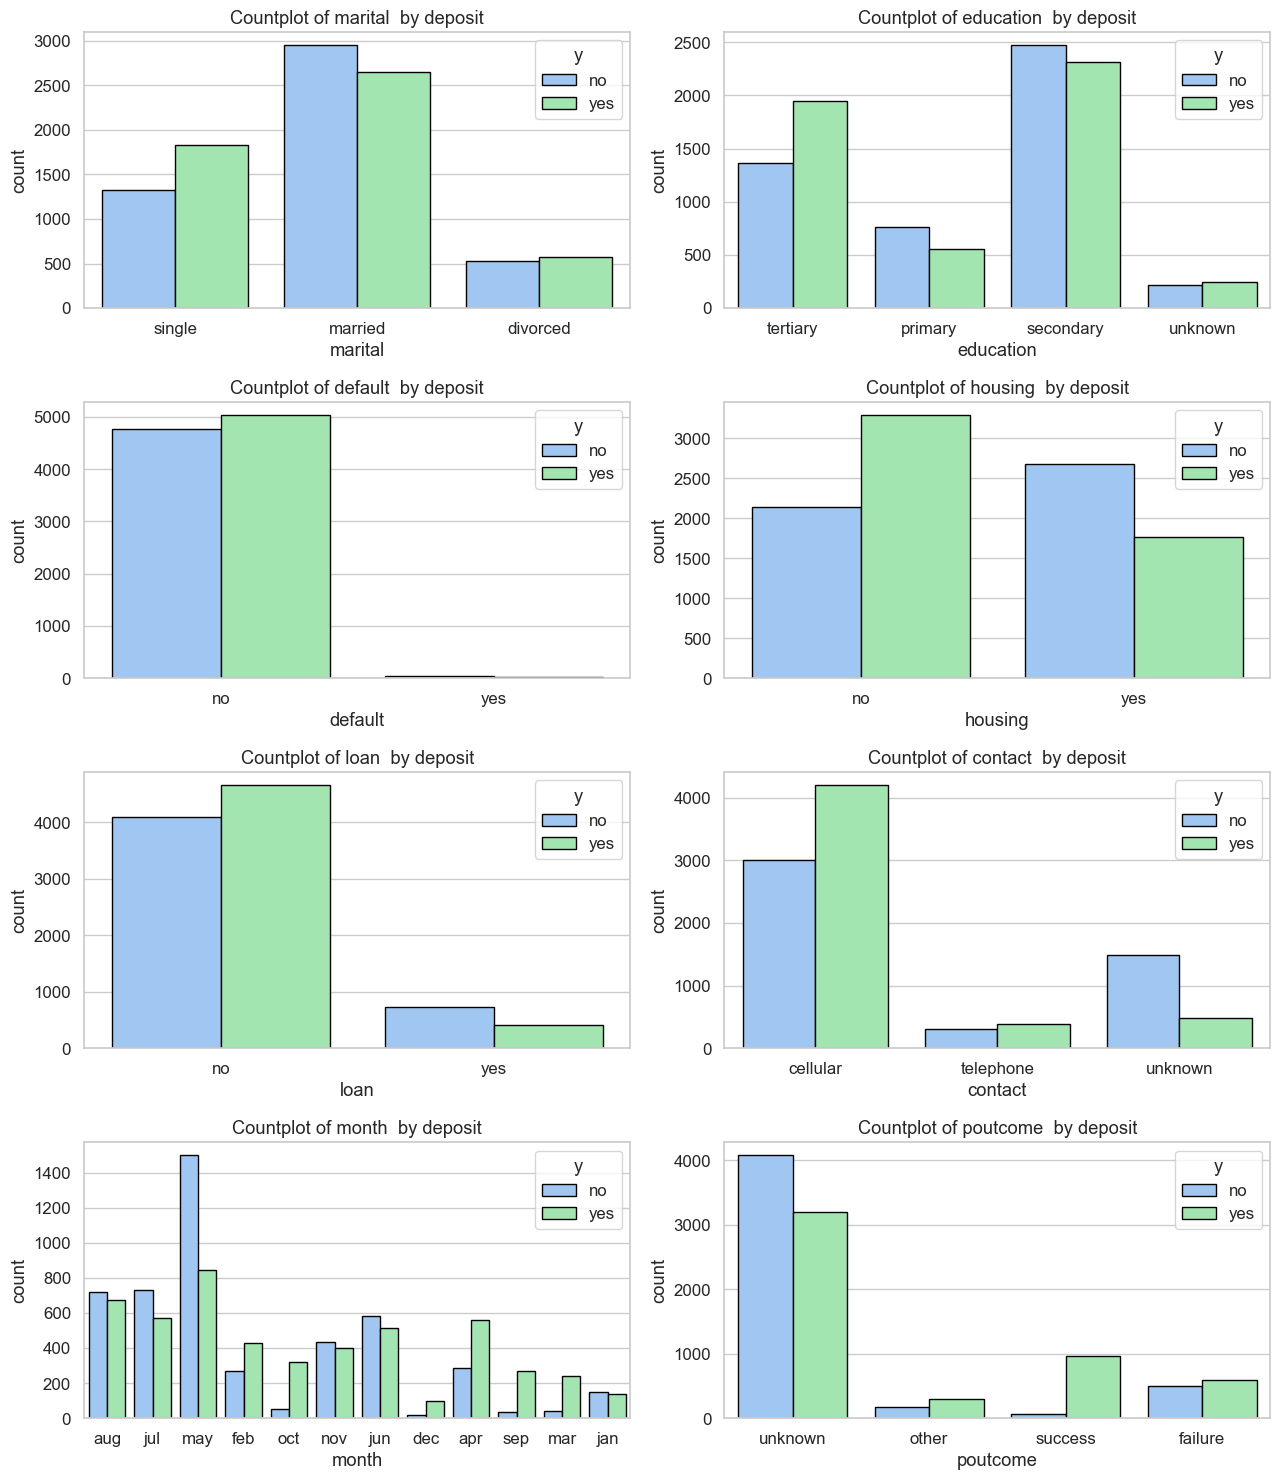

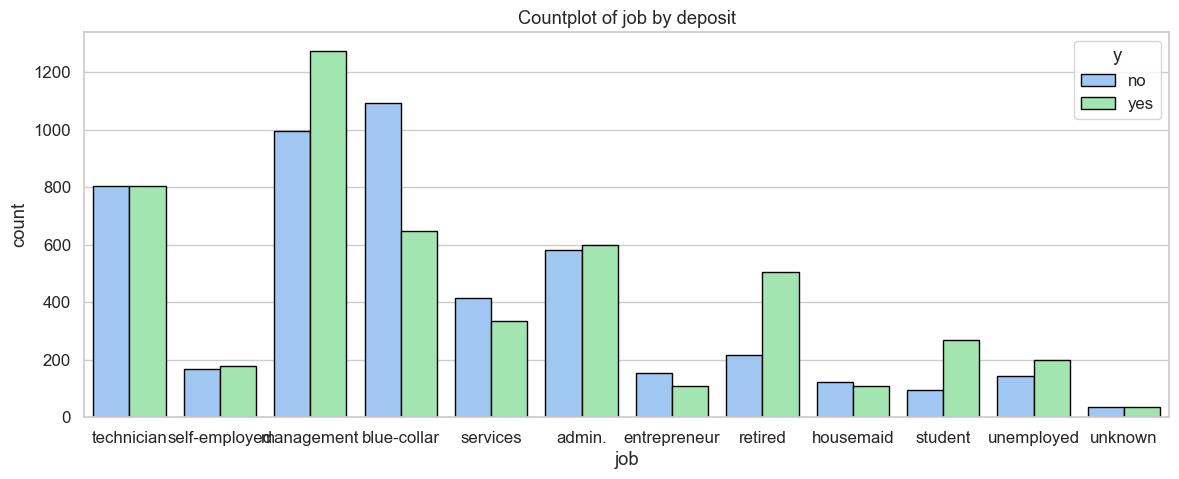

In [1780]:
plt.figure(figsize=(13, 15))

for i, data_cat in enumerate(datasetCat):
    plt.subplot(4, 2, i + 1)
    sea.countplot(x=data_cat, hue='y', data=dataset, edgecolor="black")
    plt.title("Countplot of {}  by deposit".format(data_cat))
plt.tight_layout()
plt.show()

plt.figure(figsize=[14, 5])
sea.countplot(x='job', hue='y', edgecolor="black", data=dataset)
plt.title("Countplot of job by deposit")
plt.show()

## Features distribution by age range

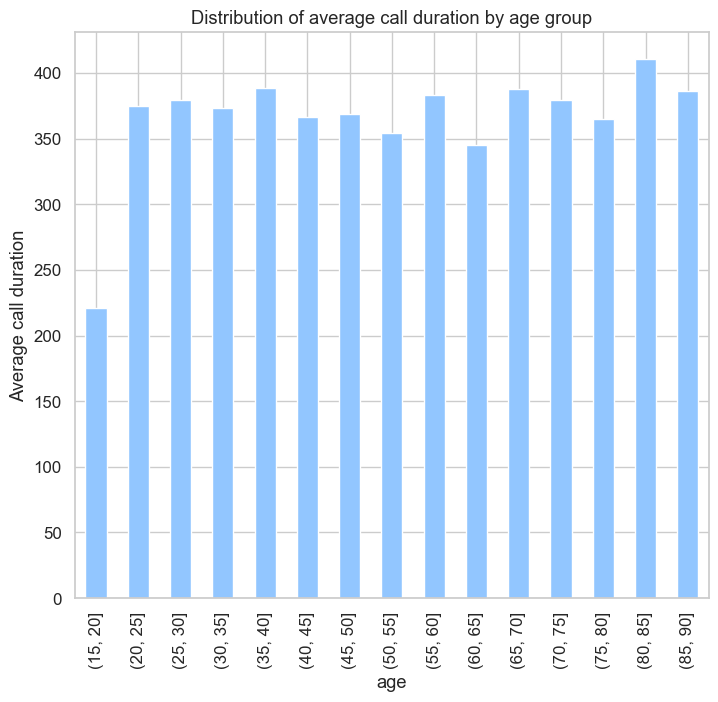

In [1781]:
plotBarChartByAgeRange(dataset, "duration", 'Average call duration','Distribution of average call duration by age group')

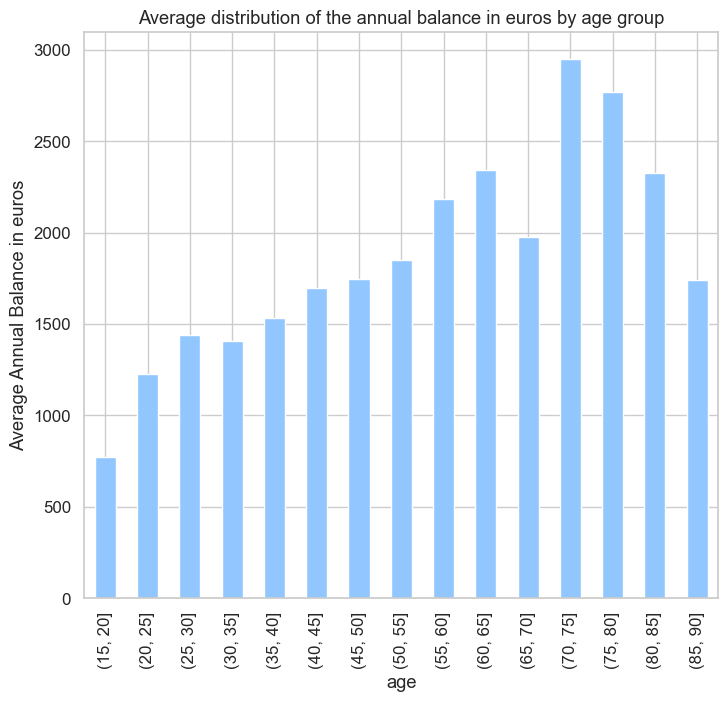

In [1782]:
plotBarChartByAgeRange(dataset, "balance",'Average Annual Balance in euros','Average distribution of the annual balance in euros by age group')

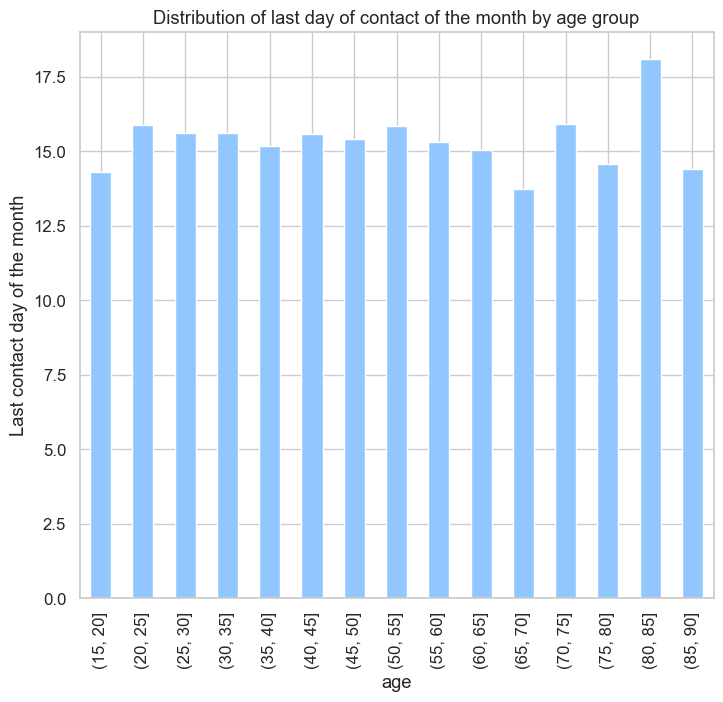

In [1783]:
plotBarChartByAgeRange(dataset, "day",'Last contact day of the month','Distribution of last day of contact of the month by age group')

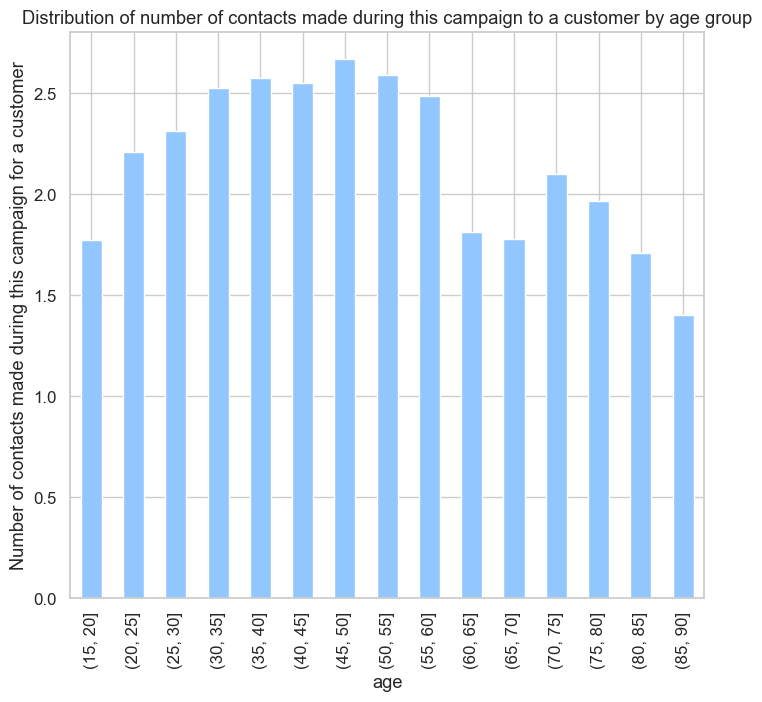

In [1784]:
plotBarChartByAgeRange(dataset, "campaign",'Number of contacts made during this campaign for a customer','Distribution of number of contacts made during this campaign to a customer by age group')

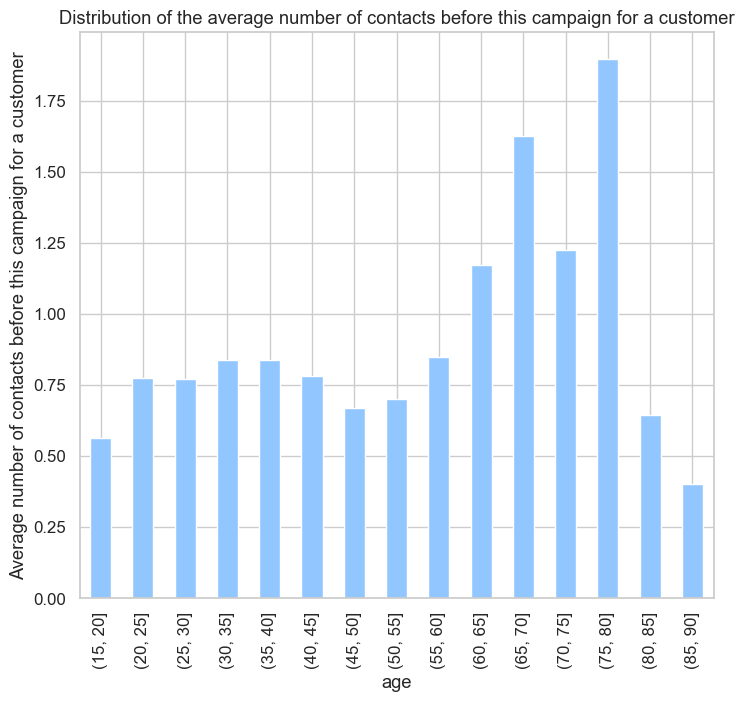

In [1785]:
plotBarChartByAgeRange(dataset, "previous",'Average number of contacts before this campaign for a customer','Distribution of the average number of contacts before this campaign for a customer')

## Scatter plots for only numeric data in relation to target

0 age
1 balance
2 day
3 duration
4 campaign
5 previous
6 y


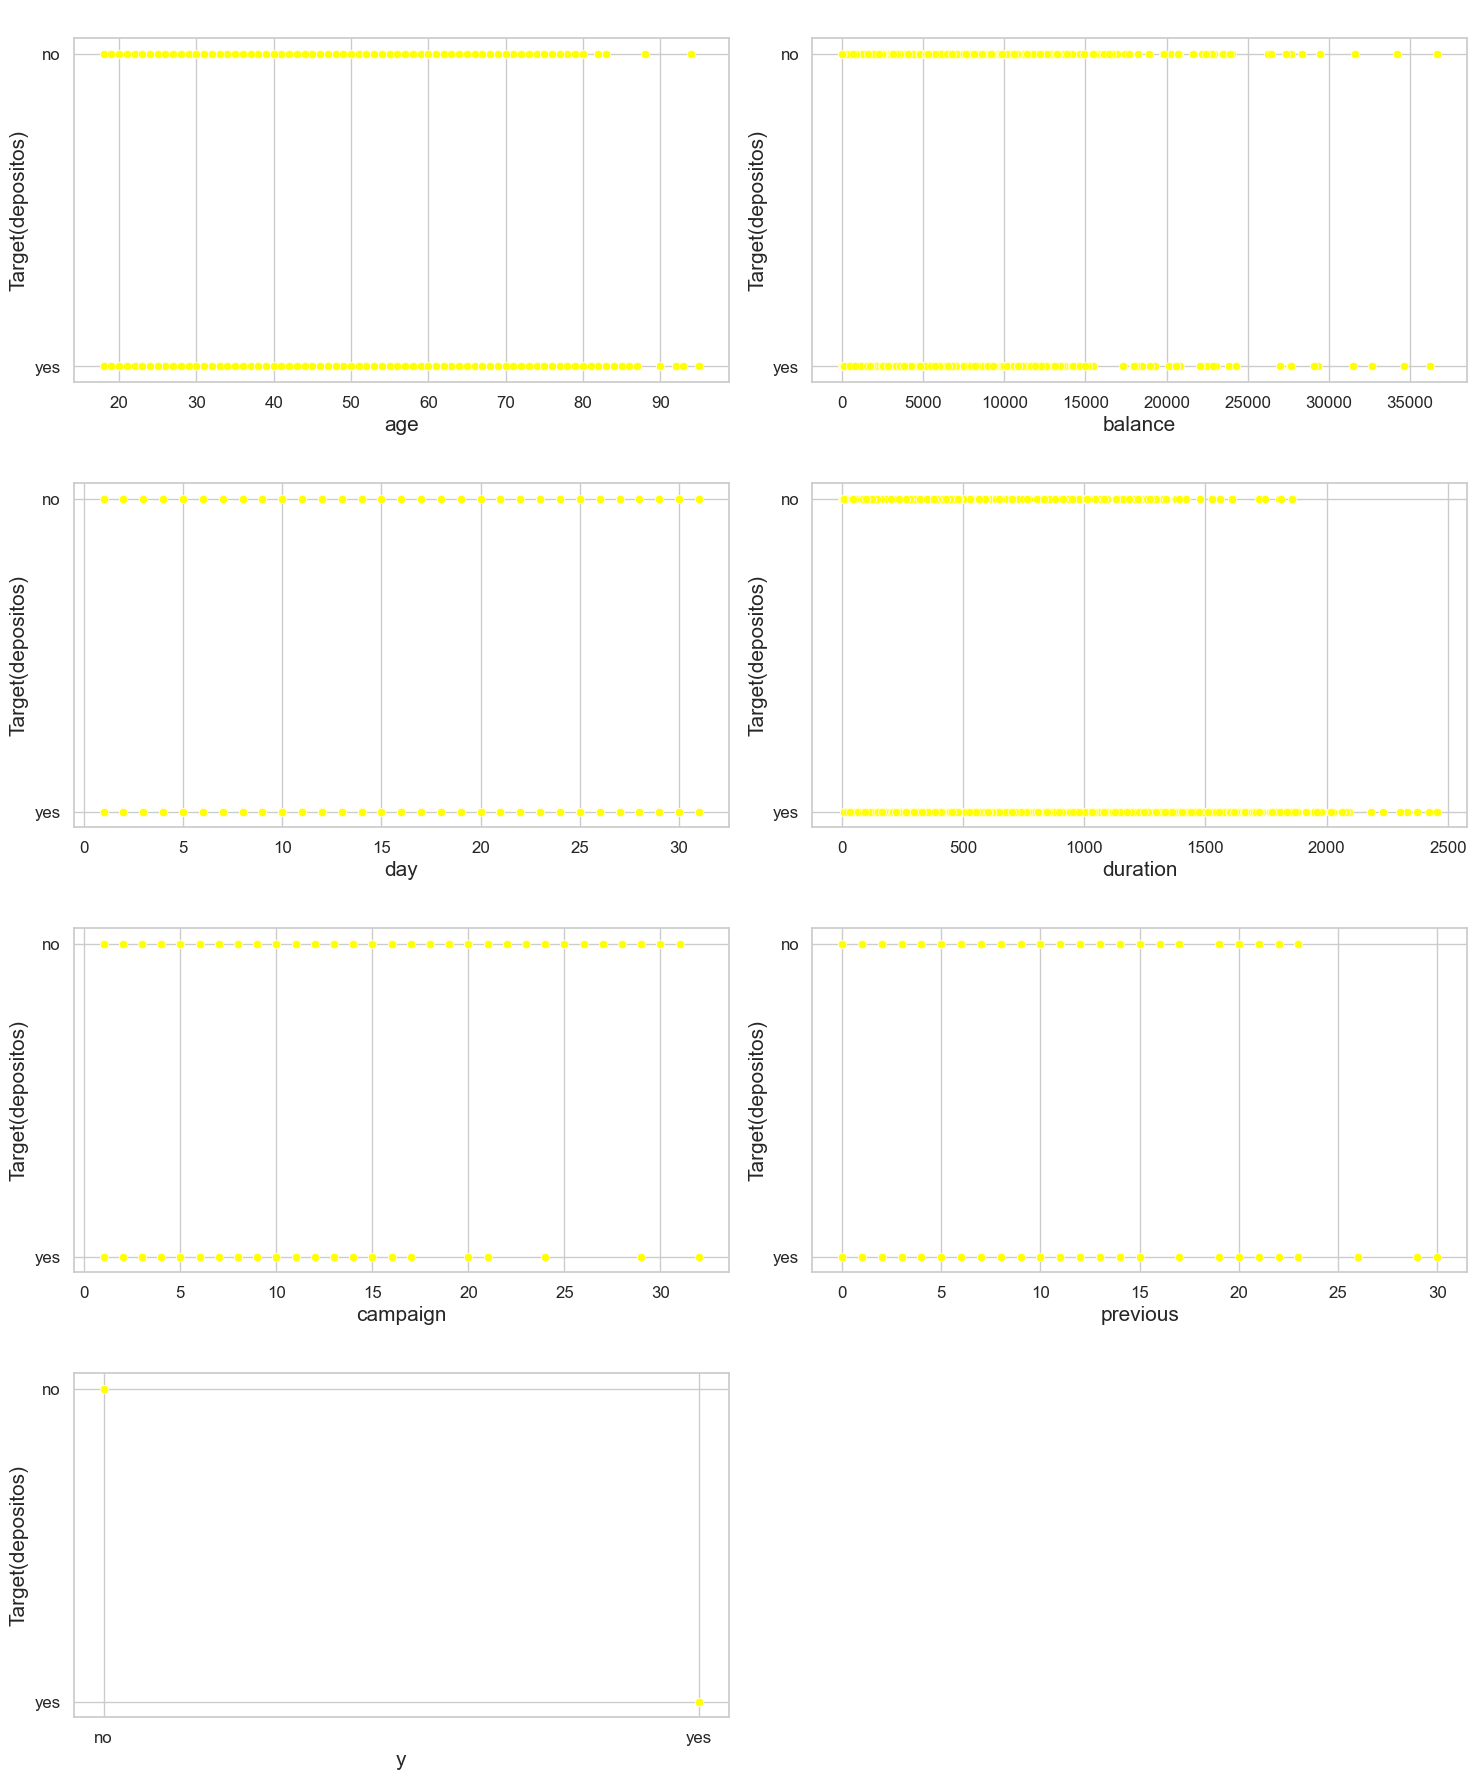

In [1786]:
cols = ['age','balance','day','duration','campaign','previous']
colsY=cols
colsY += ['y']
datasetNum = dataset[colsY]

plt.figure(figsize=(15,18))
for i, datasetN in enumerate(cols):
    print(i,datasetN)
    plt.subplot(4,2,i+1)
    sea.scatterplot(x=datasetN, y='y', data=datasetNum, color='yellow')
    plt.title("scatterplot of {} by target(depositos)".format(datasetN), size=20, color="white")
    plt.xlabel("{}".format(datasetN),size=15)
    plt.ylabel("Target(depositos)",size=15)
plt.tight_layout()

## Correlation Matrix/HeatMap

In [1787]:
dataset.corr()

,age,balance,day,duration,campaign,previous
age,1.000000,0.103836,-0.010793,-0.004697,-0.007184,0.035397
balance,0.103836,1.000000,0.021993,0.014259,-0.013135,0.043813
day,-0.010793,0.021993,1.000000,-0.004941,0.136305,-0.056813
duration,-0.004697,0.014259,-0.004941,1.000000,-0.021144,-0.020569
campaign,-0.007184,-0.013135,0.136305,-0.021144,1.000000,-0.069853
previous,0.035397,0.043813,-0.056813,-0.020569,-0.069853,1.000000


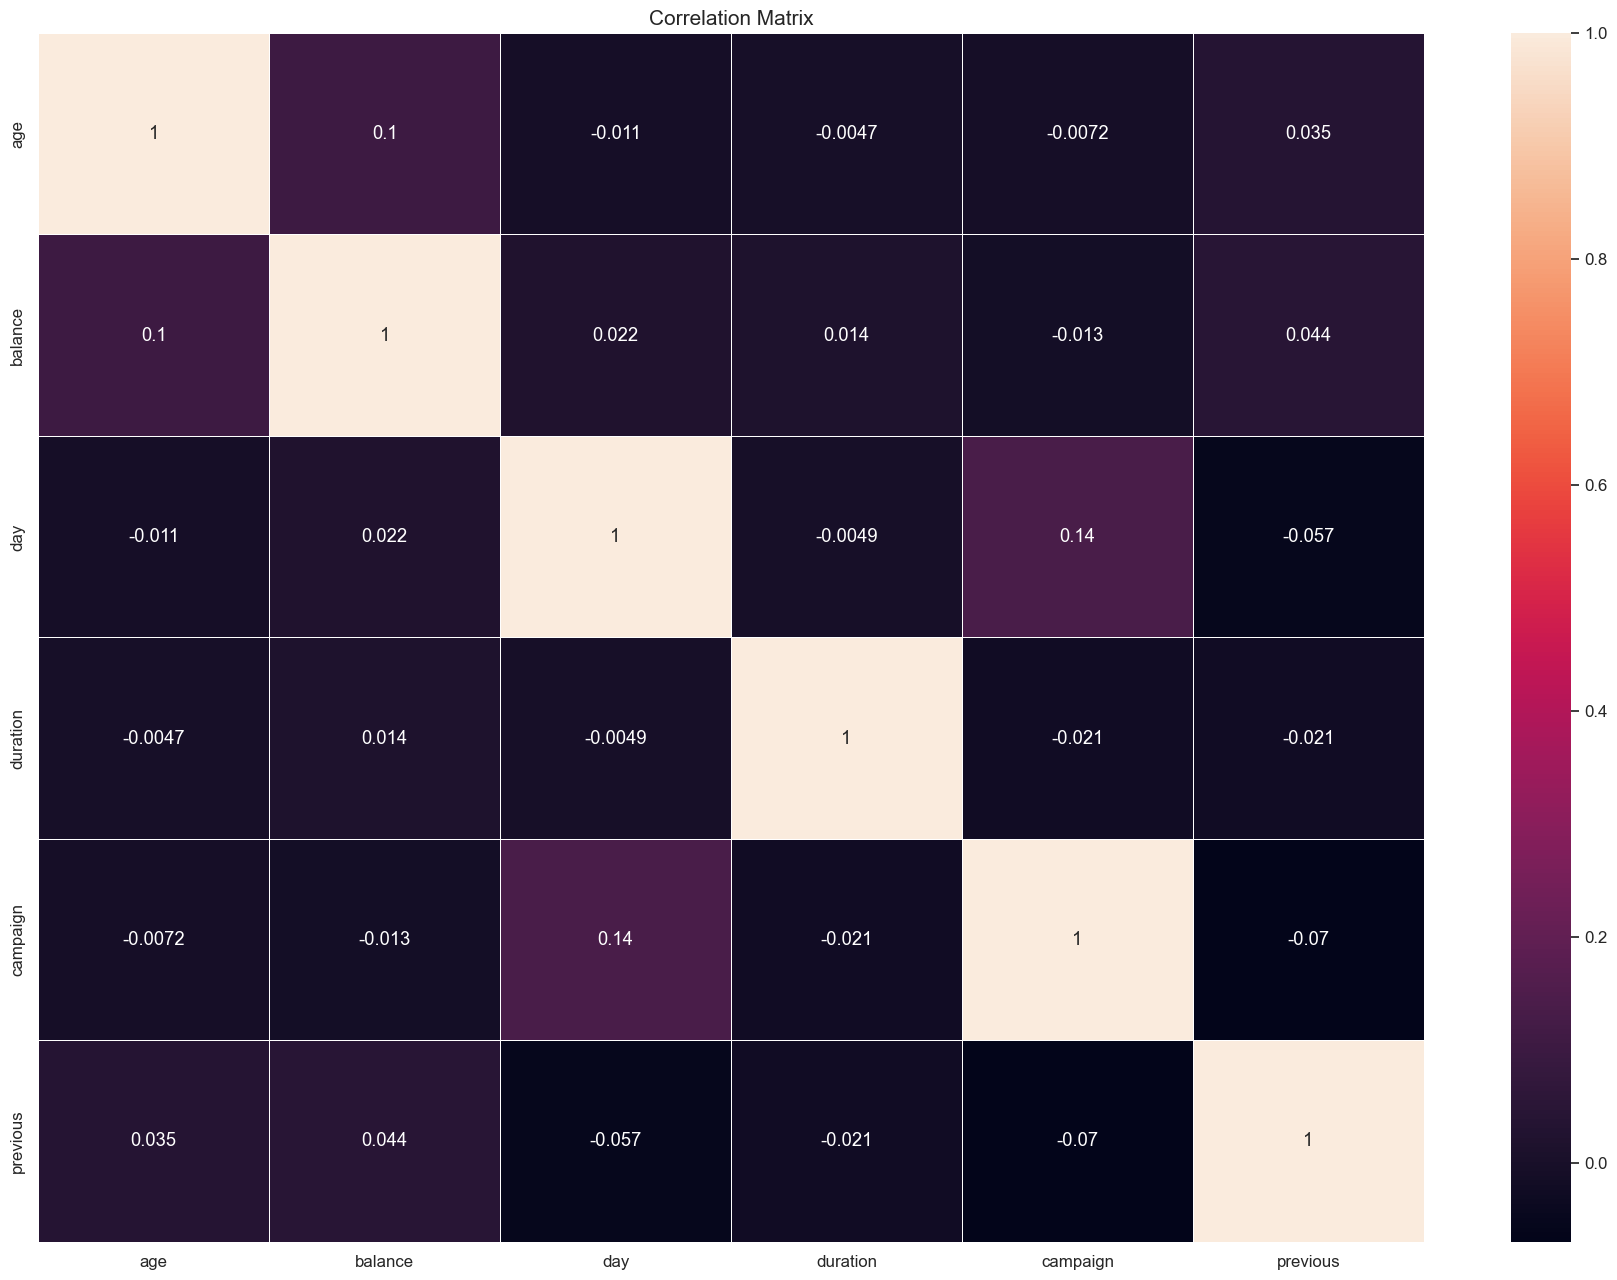

In [1788]:
plt.subplots(figsize=(18, 13))
hmap = sea.heatmap(data=dataset.corr(), annot=True, linewidths=0.5)
plt.title("Correlation Matrix", fontsize=15)
plt.tight_layout()

## [Extra] - Comparing data

### Education with marital status and balance

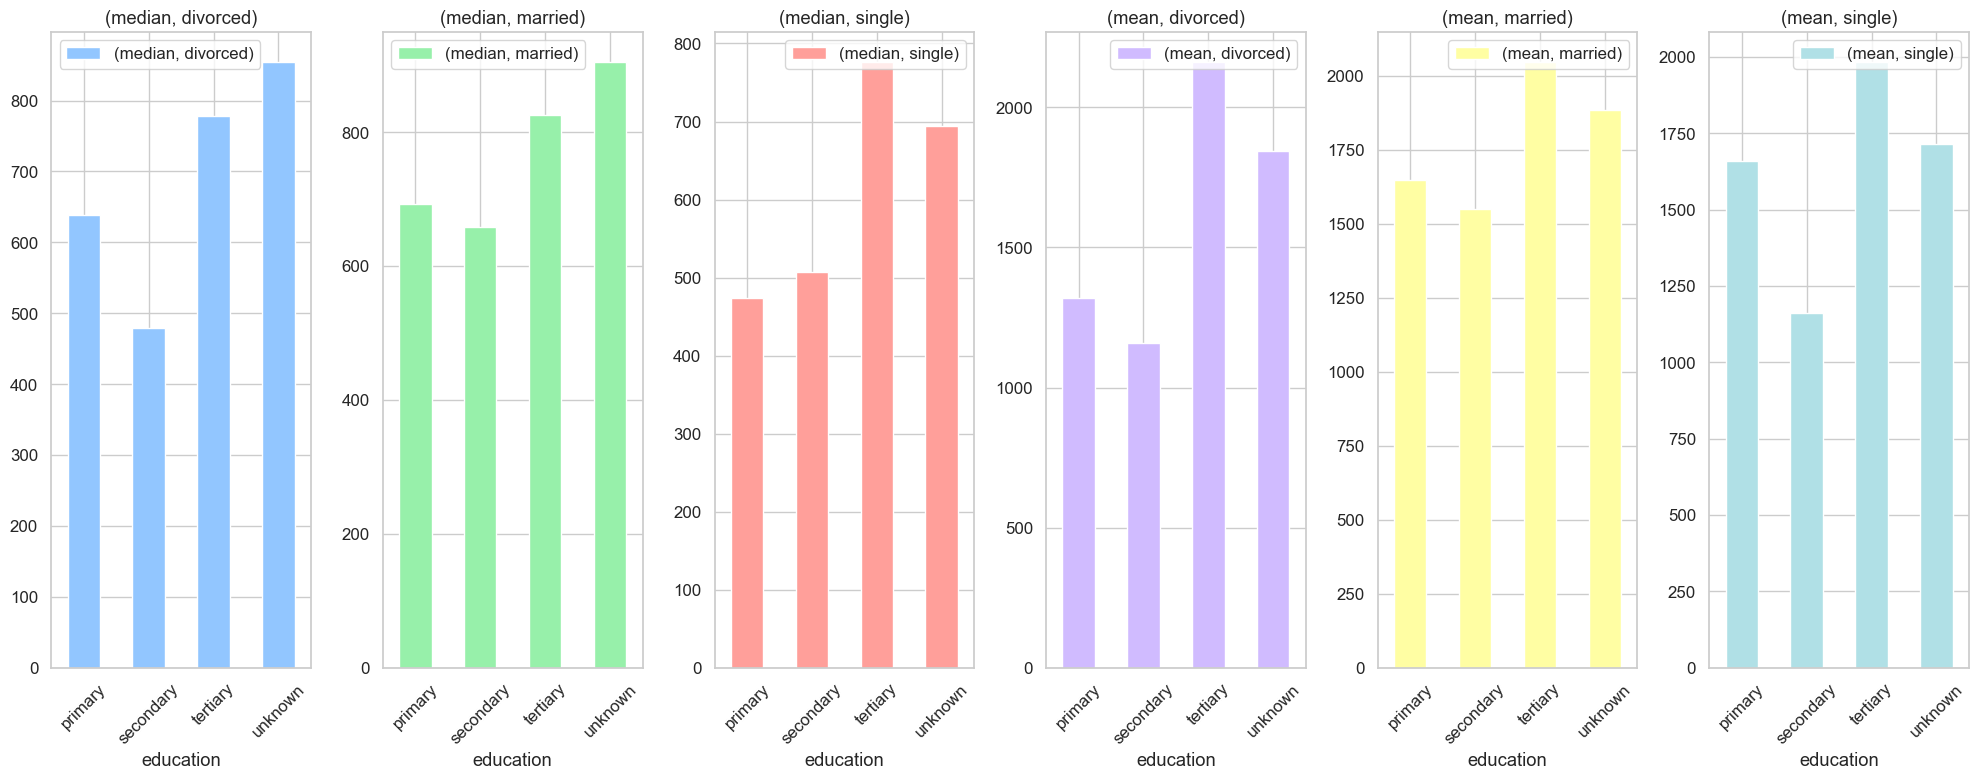

In [1789]:
education = dataset.groupby(['marital','education'], as_index=False)['balance'].agg({np.median,np.mean})
education = round(education,2)

ax = education.unstack(level=0).plot(kind='bar', subplots=True, rot=45, figsize=(20,8), layout=(1,6))
plt.tight_layout()

## Stratified sampling


In [1790]:
dataset['housing'].value_counts()/len(dataset)

no     0.549772
yes    0.450228
Name: housing, dtype: float64

In [1791]:
dataset['loan'].value_counts()/len(dataset)

no     0.885772
yes    0.114228
Name: loan, dtype: float64

In [1792]:
dataset['default'].value_counts()/len(dataset)

no     0.99281
yes    0.00719
Name: default, dtype: float64

In [1793]:

# Divide dataset between features e target
datasetTarget = dataset['y']
dataset = dataset.drop('y',axis=1)

# Test and train must have similar loans value

dataset['binary'] = dataset['loan'].astype(str) + dataset['default'].astype(str)

x_train_set, x_test_set , y_train, y_test  = train_test_split(dataset,datasetTarget,test_size=0.2, random_state=0, stratify=dataset[['binary']])

# Remove binary column because it was only an aux for the split
x_train_set = x_train_set.drop("binary",axis=1)
x_test_set = x_test_set.drop("binary",axis=1)

In [1794]:
x_train_set['default'].value_counts()/len(x_train_set)

no     0.992785
yes    0.007215
Name: default, dtype: float64

In [1795]:
x_train_set['loan'].value_counts()/len(x_train_set)

no     0.885823
yes    0.114177
Name: loan, dtype: float64

In [1796]:
x_test_set['default'].value_counts()/len(x_test_set)

no     0.992911
yes    0.007089
Name: default, dtype: float64

In [1797]:
x_test_set['loan'].value_counts()/len(x_test_set)

no     0.88557
yes    0.11443
Name: loan, dtype: float64

## Enconding categorical data

### Pipeline

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder

numerical_pipeline = Pipeline([('select_nume', DataFrameSelector(['age','balance','day','campaign','previous','duration'])),('std_scaler', StandardScaler())])

onehot_encoding = Pipeline([('onehot_encoding_sel',DataFrameSelector(['job','marital','education','default','housing','loan'])),('imputer',SimpleImputer(strategy='constant',fill_value='missing')),('onehot_enc',OneHotEncoder(sparse=False,drop='if_binary', handle_unknown='ignore'))])

#ordinal_encoding = Pipeline([('ordinal_cat_select', DataFrameSelector(['month','contact','poutcome'])),('ordianl_enc',CategoricalEncoder(encoding='ordinal'))])

ordinal_encoding = Pipeline([('ordinal_cat_select', DataFrameSelector(['month','contact','poutcome'])),('ordinal_encoder', OneHotEncoder(sparse=False, drop='if_binary', handle_unknown='ignore'))])

preprocess_pipeline = FeatureUnion([('numerical_pipeline',numerical_pipeline),('onehot_encoding',onehot_encoding),('ordinal_encoding',ordinal_encoding)])


x_train_set = preprocess_pipeline.fit_transform(x_train_set)
x_test_set = preprocess_pipeline.fit_transform(x_test_set)

In [1805]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder

x_train_sett = x_train_set.copy()
x_train_sett.drop('month', axis=1, inplace=True)
x_train_sett.drop('contact', axis=1, inplace=True)
x_train_sett.drop('poutcome', axis=1, inplace=True)
x_train_sett.drop('job', axis=1, inplace=True)
x_train_sett.drop('marital', axis=1, inplace=True)
x_train_sett.drop('education', axis=1, inplace=True)
x_train_sett.drop('default', axis=1, inplace=True)
x_train_sett.drop('housing', axis=1, inplace=True)
x_train_sett.drop('loan', axis=1, inplace=True)

num_cat = ['age','balance','day','campaign','previous','duration']
ordinal_cat = ['month','contact','poutcome']
one_hot_cat = ['job','marital','education','default','housing','loan']

num_pipe = Pipeline([('scaler',StandardScaler())])

#categorical_transformer = Pipeline([('imputer',SimpleImputer(strategy='constant', fill_value='missing'),('onehot',OneHotEncoder(handle_unknown='ignore')))])

#cat_pipe_ordinal = Pipeline([('imputer',SimpleImputer(strategy='constant', fill_value='missing')),
#                            ('ordinal_encoder',OneHotEncoder(handle_unknown='ignore', sparse=False, drop='if_binary'))])

preprocessor = ColumnTransformer([('num',num_pipe,num_cat),])


xx_train_set = preprocessor.fit_transform(x_train_sett)


In [1806]:
labels = np.concatenate([num_cat])
transformed_df_columns = pd.DataFrame(preprocessor.transform(xx_train_set).toarray(), columns=labels).columns
transformed_df_columns

ValueError: Specifying the columns using strings is only supported for pandas DataFrames

### Without pipeline

In [ ]:
#Binary Encoding

list_bin = ['default','housing','loan']
for i in list_bin:
    dataset[i] = LabelBinarizer().fit_transform(dataset[i].values)

#Ordinal Encoding

list_ordinal=['month','contact','poutcome']
for i in list_ordinal:
    dataset[i]=LabelEncoder().fit_transform(dataset[i].values)

# Dummy Encoding

dataset = pd.get_dummies(dataset, columns= ['job','marital','education'])

# Reset Index and check dataset again

dataset = dataset.reset_index()
dataset.drop('index', axis=1, inplace=True)

dataset['binary'] = dataset['loan'].astype(str) + dataset['default'].astype(str)

x_train_set_np, x_test_set_np , y_train_set_np, y_test_set_np = train_test_split(dataset,datasetTarget,test_size=0.2, random_state=0, stratify=dataset[['binary']])

# Binary columns no longer needed
x_train_set_np = x_train_set_np.drop("binary",axis=1)
x_test_set_np = x_test_set_np.drop("binary",axis=1)


#Scaling

ss= StandardScaler()

x_train_set_np_org = ss.fit_transform(x_train_set_np)
x_test_set_np_org = ss.fit_transform(x_test_set_np)

x_train_set_np_sc = ss.fit_transform(x_train_set_np[['age','balance','day','duration','campaign','previous']])
x_test_set_np_sc = ss.transform(x_test_set_np[['age','balance','day','duration','campaign','previous']])